### Table of Contents

1. [Prediction Prototype Algorithm](#PredictionPrototypeAlgorithm)
2. [Utility Functions](#UtilityFunctions) 
3. [Creating Data Frames for Already Processed DataSets](#CreatingDataFramesforAlreadyProcessedDataSets) 
4. [Covid_19_Countires_Wise Analysis](#Covid_19_Countires_Wise_Analysis)
    - 4.1 [Data Preprocessing](#DataPreprocessing)
    - 4.2 [Creating Time Series model](#CreatingTimeSeriesmodel)
    - 4.3 [Visualize Covid-19 Time Series Predictions](#VisualizeCovid19TimeSeriesPredictions)
    - 4.4 [Prediction Prototype Algorithm](#PredictionPrototypeAlgorithm)
    - 4.5 [Covid 19 Data Frame Generated by Time Series Model](#Covid19DataFrameGeneratedbyTimeSeriesModel)
    - 4.6 [Selecting the population of the countries under consideration](#Selectingthepopulationofthecountriesunderconsideration)
    - 4.7 [Normalising covid data with population  ](#Normalisingcoviddatawithpopulation )
    - 4.8 [Covid-19 Clusters Plot](#Covid19ClustersPlot)
    - 4.9 [Labeling Criterion for Covid Data ](#LabelingCriterionforCovidData)
    - 4.11[Covid19 Daily Data Analysis](#Covid19DailyDataAnalysis)
    - 4.12[Covid19 Daily Clusters Plot](#Covid19DailyClustersPlot)
5. [Population data based on classification of Age groups](#PopulationdatabasedonclassificationofAgegroups)
    - 5.1 [Age groups Classification Clusters Plot](#AgegroupsClassificationClustersPlot)
    - 5.2 [Cluste Labeling :- Age groups](#ClusteLabelingAgegroups)
6. [Co-morbidities Dataframe Clustering](#ComorbiditiesDataframeClustering)
    - 6.1 [HIVs](#HIV)
     - 6.1.1 [HIV Cluster Plot](#HHIVClusterPlot)
     - 6.1.2 [Cluste Labeling :- HIV Cases](#ClusteLabelingHIVCases)
    - 6.2 [Blood Pressure](#BloodPressure)
     - 6.2.1 [Blood Pressure Cluster Plot](#BloodPressureClusterPlot)
     - 6.2.2 [Cluste Labeling :- Blood Pressure Cases](#ClusteLabelingBloodPressureCases)
    - 6.3 [Diabetes](#Diabetes)
     - 6.3.1 [Diabetes Cluster Plot](#DiabetesPlot)
     - 6.3.2 [Cluste Labeling :- Diabetes Cases](#ClusteLabelingDiabetesCases)
    - 6.4 [Tuber Culosis](#TuberCulosis)
     - 6.4.1 [Tuber Culosis Cluster Plot](#TuberCulosisClusterPlot)
    - 6.5 [Medical Expending](#MedicalExpending)
     - 6.5.1 [Medical Expending Cluster Plot](#MedicalExpendingClusterPlot)
     - 6.5.2 [Cluste Labeling :- Medical Expending](#ClusteLabelingMedicalExpending)
7. [Listing all the Clusters of Comorbidites](#ListingalltheClustersofComorbidites)
8. [Main Cluster for Prediction](#MainClusterforPrediction)
    - 8.1 [Main Mega Frame Formation](#MainMegaFrameFormation)
    - 8.2 [Ensuring Clusters Uniformity](#EnsuringClustersUniformity)
    - 8.3 [Main Cluster Plot](#MainClusterPlot)
    - 8.4 [Cluste Labeling :- Main Cluster](#ClusteLabelingMainCluster)
9. [Preparing Data for Deep Net Model](#PreparingDataforDeepNetModel)
    - 9.1 [Deep Net Model](#DeepNetModel)
10. [Vaccine Dosage Prediction](#VaccineDosagePrediction)
    - 10.1 [Minimum Covid Vaccine Required Plot](#MinimumCovidVaccineRequiredPlot)
    - 10.2 [Minimum Percentage Vaccine Required Plot](#MinimumPercentageVaccineRequiredPlot)
    - 10.3 [Countries Covid Vulnerability Status Plot](#CountriesCovidVulnerabilityStatusPlot)
11. [Discussion](#discuss)
    

# Prediction Prototype Algorithm
<a class="anchor" id="PredictionPrototypeAlgorithm"></a>

In [1]:
## To Enable Verbos Mode set Verbose to True
Verbose = False
Debug = False
TimeSeriesEnable = True
No_of_days_To_Predict = 15
Analysis_window = 10    ## Enter no of Days to backpropogate  value < 30 

In [2]:
## Importing important libraries

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=30)
matplotlib.rcParams.update({'font.size': 28})
from mpl_toolkits.mplot3d import Axes3D
import math
import datetime as dt
import os
import sys

## ML Models import
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import linear_model
from sklearn.decomposition import PCA

## Deep net model Pytorch module import
import torch
from torch import nn
import torch.nn.functional as F
from torch import optim

## For Date time processing requirments
from datetime import datetime


In [3]:
## PCA Decomposition Configuration
pca = PCA(n_components=2)

## Utility Functions
<a class="anchor" id="UtilityFunctions"></a>

In [4]:

## Visulalization function 
def Visualize(dataset,List_of_count_to_print,title1,ylab,vx=50,vy=30,w=.80):
    df = dataset
    n = 0
    for i in List_of_count_to_print:
        filter1 = df['Country'] == i
        df = df[filter1]
        labels = df['Date']
        conf = df['Confirmed']
        Recov = df['Recovered']
        Death = df['Deaths']
        
        #high = max(conf)
        #low = min(conf)
        
        x = np.arange(len(labels))  # the x label locations 
        width = w  # the width of the bars
        fig, ax = plt.subplots(figsize=(vx,vy))
        rects1 = ax.bar(x - width, conf, width, label='confirmed')
        rects2 = ax.bar(x , Recov, width, label='Recovered')
        rects3 = ax.bar(x + width , Death, width, label='Death')

        # Add some text for labels, title and custom x-axis tick labels, etc.
        ax.set_ylabel(ylab)
        ax.set_title(title1)
        ax.set_xticks(x)
        plt.xticks(rotation=90) 
        #plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])
        ax.set_xticklabels(labels)
        ax.legend()
        n  = n + 1
    
    
    plt.show()
    
## function to Check the List of Countries avaialable
def count_avalaible(dataframe,country_coul_rep = 'Country'):
    x = 0
    for i in set(dataframe.loc[:,country_coul_rep]):
        print(i,end=' | ')
        x = x + 1
        if(x > 6):
            x = 0
            print()
    print("\n\n##Total No of Countries = " + str(len(set(dataframe.loc[:,country_coul_rep]))))
    
    
## Function for Cluster Plotting 

def plot_cluster(data_frame,title,xlabel,ylabel):
    g1x = []
    g1y = []
    g2x = []
    g2y = []
    g3x = []
    g3y = []
    g4x = []
    g4y = []
    g5x = []
    g5y = []
    g6x = []
    g6y = []
    g7x = []
    g7y = []
    g8x = []
    g8y = []
    g9x = []
    g9y = []
    g10x = []
    g10y = []

    for i,j,k in data_frame:
        if(k == 0):
            g1x.append(i)
            g1y.append(j)
        elif(k==1):
            g2x.append(i)
            g2y.append(j)
        elif(k==2):
            g3x.append(i)
            g3y.append(j)
        elif(k==3):
            g4x.append(i)
            g4y.append(j)
        elif(k==4):
            g5x.append(i)
            g5y.append(j)
        elif(k==5):
            g6x.append(i)
            g6y.append(j)
        elif(k==6):
            g7x.append(i)
            g7y.append(j)
        elif(k==7):
            g8x.append(i)
            g8y.append(j)
        elif(k==8):
            g9x.append(i)
            g9y.append(j)
        elif(k==9):
            g10x.append(i)
            g10y.append(j)



    data = [(g1x,g1y), (g2x,g2y), (g3x,g3y), (g4x,g4y), (g5x,g5y), (g6x,g6y), (g7x,g7y), (g8x,g8y), (g9x,g9y), (g10x,g10y)]
    colors = ("red", "green", "blue","orange","purple","black","magenta","cyan","gold","cadetblue")
    groups = ("Cluster1", "Cluster2", "Cluster3","Cluster4","Cluster5","Cluster6","Cluster7","Cluster8","Cluster9","Cluster10")
    
    ## Testing the number of clusters to be ploted
    no_of_cluster = 0
    for i in data:
        if(len(i[0]) == 0):
            break
        no_of_cluster += 1
    # Create plot
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, facecolor = "1.0")

    for data, color, group in zip(data, colors[:no_of_cluster], groups[:no_of_cluster]):
        print(data)
        t = data
        x , y = t
        ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=100, label=group)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.title(title)
    plt.legend(prop={"size":10}, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
    
    
def plot_cluster_3d(data_frame,title,xlabel,ylabel,zlabel):
    
    a = []
    b = []
    c = []
    d = []
    
    for i in data_frame:
        a.append(i[0][0])
        b.append(i[1][0])
        c.append(i[2][0])
        d.append(i[3])
        
    data = pd.DataFrame()
    
    data['val1'] = a
    data['val2'] = b
    data['val3'] = c
    data['cluster'] = d
    
    colors = ["red", "green", "blue","yellow","purple","black","magenta","cyan"]
    groups = ["Sever1", "Sever2", "Sever3","Sever4","Sever5","Sever6","Sever7","Sever8"]
    
    for i in range(1,len(data)):
        print(data.iloc[i])
    
    
    # Create plot
    fig = plt.figure()
    ax = fig.add_subplot(111,projection='3d')
    #ax = Axes3D(fig)
    
    print(data)
    
    x = np.array(data['val1'])
    y = np.array(data['val2'])
    z = np.array(data['val3'])
    
    ax.scatter(x,y,z, marker="s", c='red', edgecolors='none', s=100, label=groups) #,cmap="RdBu")

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)
    plt.title(title)
    plt.legend(loc=2,prop={"size":10})
    plt.show()
    
    

In [5]:
import pandas as pd
import torch
from torch.utils.data import Dataset
from sklearn.preprocessing import StandardScaler


class CSVDataset(Dataset):
    # load the dataset
    def __init__(self, file_name):
        # store the inputs and outputs

        file_out = pd.read_csv(file_name)
        self.X = file_out.values
        self.Y = file_out.values

        # Scaling the features
        sc = StandardScaler()
        x_train = sc.fit_transform(self.X)
        y_train = self.Y

        self.x_train = torch.tensor(x_train , dtype=torch.float32)
        self.y_train = torch.tensor(y_train)

    # number of rows in the dataset
    def __len__(self):
        return len(self.X)

    # get a row at an index
    def __getitem__(self, idx):
        return [self.x_train[idx], self.y_train[idx]]

In [6]:
# Function to transform Dataframes from [Values] to Values

def transformDataframe(data):
    column_heading = list(data.columns)
    for i in range(len(column_heading)):
        if((str(type(data[column_heading[i]][0])) == "<class 'numpy.int32'>") or (str(type(data[column_heading[i]][0])) == "<class 'int'>")):
            column_heading.remove(column_heading[i])
    for k in column_heading:
        for i in data.index: 
            data[k][i] = float(data[k][i][0])
    return data

In [7]:
def auto_labeler(data,pos_neg_vector):
    
    clus_labels = ["Sever-1","Sever-2","Sever-3","Sever-4","Sever-5","Seve-6","Sever-7","Sever-8","Sever-9","Sever-10"]
    
    data = transformDataframe(data) ## Trasnforming data frame
    
    
    ## Calculating means for different cluster values
    clus_count = len(set(data['cluster']))
    Clus_vals = []
    Clus_final_score = []
    for i in range(clus_count):Clus_vals.append(list(data[data['cluster'] == i].mean()))
    print("Cluster Mean Values " + str(Clus_vals))
    
    
    print(len(Clus_vals[0]) - 1)
    
    for j in range(clus_count):
        temp_value = 0
        for i in range(len(Clus_vals[0]) - 1):                                # -1 is done so that we dont consider cluster column
            temp_value = temp_value + (float(pos_neg_vector[i]) * Clus_vals[j][i])
        Clus_final_score.append(temp_value)
    
    print("Final Cumlative Cluster Scores" + str(Clus_final_score))
    
    Decison_Clus = Clus_final_score.copy()
    
    Decison_Clus.sort()
    
    print("Final Cumlative Cluster Scores sorted " + str(Decison_Clus))
    
    result_lis = []
    
    for i in Decison_Clus:
        for j in range(len(Clus_final_score)):
            if(i == Clus_final_score[j]):
                result_lis.append(j)
                break
    
    print("Labeled Cluster:- " + str(result_lis))
    result = []
    for i in result_lis:
        result.append([i,clus_labels[i]])
        
    # Output Generator
    print("\033[1m" + "\nCluster Auto Labeling \n" + "\033[1m")
    for i in range(len(result_lis)):
        print("\033[1m" + "Cluster " + str(result_lis[i])  + " ------> " + "Susceptibility " +clus_labels[i] +  " " + "\033[1m")
        print("\n")
        
        
    return result,result_lis
                
                
    
    
        
        
    
        
    
    

In [8]:
# Auto Weight Generations 


def auto_weight_gen(clus_data):
    length = len(clus_data)
    final_weight_list = []
    weight_list = []
    for i in range(length):
        weight_list.append(i/(length-1))
#         final_weight_list.append(0)
    for i in range(len(clus_data)):
        final_weight_list.append(weight_list[clus_data.index(i)])
    print(final_weight_list)    
    return final_weight_list
        
#auto_weight_gen(labeled_clus_pop) 

def auto_cluster_label(clus_data):
    length = len(clus_data)
    final_weight_list = []
    weight_list = []
    for i in range(length):
        weight_list.append(i)
    for i in range(len(clus_data)):
        final_weight_list.append(weight_list[clus_data.index(i)])
    print(final_weight_list)    
    return final_weight_list

In [9]:
def Data_range_selector(date,no_of_days):
    if(no_of_days > 30):
        no_of_days = 30
        
    month_days = [31,28,31,30,31,30,31,30,31,30,31,30]
    date = Latest_date.split('-')
    val = 0
    if(int(date[2]) > int(no_of_days)):
        val = int(date[2]) - int(no_of_days)
        date[2] = str(val)
        return " ".join(date).replace(" ","-")
    
    
    else:
        if(int(date[1]) != int('01')):
            if((int(date[1]) - 1) < 10):
                date[1] = '0'+ str(int(date[1]) - 1 )
            else:
                date[1] = str(int(date[1]) - 1 )
                
            val = 0 
            val = int(no_of_days) - int(date[2]) 
            date[2] = str(month_days[int(date[1]) - 1] - val)
            
            return " ".join(date).replace(" ","-")
        else:
            date[1] = str(12)
            val = 0 
            val = int(no_of_days) - int(date[2]) 
            date[2] = str(month_days[12 - 1] - val)
            
            date[0] = str(int(date[0]) - 1 )
            
            return " ".join(date).replace(" ","-")
            
            

In [10]:
def transformDataframeto_float(data):
    column_heading = list(data.columns)
    for k in column_heading:
        for i in data.index: 
            data[k][i] = float(data[k][i])
    return data

# Creating Data Frames for Already Processed DataSets
<a class="anchor" id="CreatingDataFramesforAlreadyProcessedDataSets"></a>

In [11]:
Covid_19_Countires_Wise = pd.read_csv('../../Covid-19-Data(selected-dataset)/countries-aggregated.csv')
Blood_Pressure_Countires_Wise = pd.read_csv('../Pre_Processed_Data/Blood_Pressure_Countires_Wise_Processed.csv')
Diabetes_Countires_Wise = pd.read_csv('../Pre_Processed_Data/Diabetes_Countires_Wise_Processed.csv')
HIV_Countires_Wise = pd.read_csv('../Pre_Processed_Data/HIV_Countires_Wise_Processed.csv')
Medical_Expending_Countires_Wise = pd.read_csv('../Pre_Processed_Data/Medical_Expending_Countires_Wise_Processed.csv')
Population_Data_Countires_Wise = pd.read_csv('../Pre_Processed_Data/Population_Data_Countires_Wise_Descreet_Processed.csv')
Population_Data_Countires_Wise_Descreet = pd.read_csv('../Pre_Processed_Data/Population_Data_Countires_Wise_Descreet_Processed.csv')
Tuber_Culosis_Countires_Wise = pd.read_csv('../Pre_Processed_Data/Tuber_Culosis_Countires_Wise_Processed.csv')
Population_Data_Age_Wise = pd.read_csv('../Pre_Processed_Data/Population_Data_Age_Wise.csv')
## Removing extra Unnamed:0 columns created during file storage 

Blood_Pressure_Countires_Wise = Blood_Pressure_Countires_Wise.drop(['Unnamed: 0'],axis=1)
Diabetes_Countires_Wise = Diabetes_Countires_Wise.drop(['Unnamed: 0'],axis=1)
HIV_Countires_Wise = HIV_Countires_Wise.drop(['Unnamed: 0'],axis=1)
Medical_Expending_Countires_Wise = Medical_Expending_Countires_Wise.drop(['Unnamed: 0'],axis=1)
Population_Data_Countires_Wise = Population_Data_Countires_Wise.drop(['Unnamed: 0'],axis=1)
Tuber_Culosis_Countires_Wise = Tuber_Culosis_Countires_Wise.drop(['Unnamed: 0'],axis=1)
Population_Data_Countires_Wise_Descreet = Population_Data_Countires_Wise_Descreet.drop(['Unnamed: 0'],axis=1)
Population_Data_Age_Wise = Population_Data_Age_Wise.drop(['Unnamed: 0'],axis=1)


## 1. Covid_19_Countires_Wise Analysis
<a class="anchor" id="Covid_19_Countires_Wise_Analysis"></a>

## Data Preprocessing
<a class="anchor" id="DataPreprocessing"></a>

In [12]:
#Covid_19_Countires_Wise = Covid_19_Countires_Wise.drop([length-1])
Covid_19_Countires_Wise.fillna(0)
# if Verbose:
#     Covid_19_Countires_Wise

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0
...,...,...,...,...,...
80251,2021-03-10,Zimbabwe,36341,33953,1489
80252,2021-03-11,Zimbabwe,36377,33972,1492
80253,2021-03-12,Zimbabwe,36423,33996,1496
80254,2021-03-13,Zimbabwe,36471,34011,1501


In [13]:
data = np.array(Covid_19_Countires_Wise)
date_range = data[:,0]
Country_name = data[:,1]
time_series_data = data[:,[2,3,4]]

if Verbose:
    print(time_series_data)

Xs = time_series_data

n = len(set(list(data[:,0])))
if Verbose:
    print(n)

## Creating Time Series model
<a class="anchor" id="CreatingTimeSeriesmodel"></a>

In [14]:
## No of days data collected so far
n = len(set(list(data[:,0])))

def time_series_forecaste(data,pred):
    fix_latest_data = np.amax(data,axis=0)[0]
    w1 = []
    fix_latest_data = np.datetime64(fix_latest_data) + np.timedelta64(1,'D')
    predict_frame = np.zeros(shape=(1,5)) 
    filter1 = []
    #latest_data = type(dt.datetime(latest_data))
    countries = set(list(data[:,1]))
    p = 0
    x = 0 
    for i in countries:
        latest_data = fix_latest_data
        filter1.clear()
        p = p + 1
        completed = (p/len(countries))*100
        if(p == n/4 or p == n/2 or p == (n*3)/4 or p == n):
            print(f'% completed = {completed}', flush=True)
        count = pred
        
        for j in range(0,len(data[:,0])):
            if(data[j,1] == i):
                filter1.append(True)
            else:
                filter1.append(False)
        data2 = data[filter1]
        w1.clear()
        for j in range(0,len(data2[:,0])):
            if(data2[j,1] == i):
                x = x + 1
                
                for k in range(len(data2[:,[2]])):
                    w1.append((len(data2[:,[2]])- k)/len(data2[:,[2]]))
                
                count = count - 1
                val1 = ((sum(data2[:,2]*w1))/len(data2[:,[2]]))
                val2 = ((sum(data2[:,3]*w1))/len(data2[:,[3]]))
                val3 = ((sum(data2[:,4]*w1))/len(data2[:,[4]]))
                predict_frame = np.append(predict_frame,[str(latest_data),str(i),str(int(val1)),str(int(val2)),str(int(val3))])
                predict_frame = predict_frame.reshape((int(len(predict_frame)/5)),5)
                latest_data = np.datetime64(latest_data) + np.timedelta64(1,'D')
                data2 = np.append(data2,[str(latest_data),str(i),int(val1),int(val2),int(val3)])
                data2 = data2.reshape((int(len(data2)/5)),5)
                data2[:,[2,3,4]] = data2[:,[2,3,4]].astype(np.int)
                w1.clear()
                if(count < 0):
                    break
    new_val = pd.DataFrame(predict_frame[1:,[0,1,2,3,4]])
    new_val = new_val.rename(columns = {0:'Date',1:'Country',2:'Confirmed',3:'Recovered',4:'Deaths'}, inplace = False)
    print('  completed Succesfully ', flush=True)
    return new_val
                
No_of_days_to_predict_in_future = No_of_days_To_Predict         
val123 = time_series_forecaste(data,No_of_days_to_predict_in_future) 
Future_covid_predictions = val123
if Verbose:
    val123  



  completed Succesfully 


In [15]:
val = np.array(val123)
val[:,[2]].astype(np.int)
w1 = []
for i in range(len(val[:,[2]])):
    w1.append((len(val[:,[2]])-i)/len(val[:,[2]]))
    
if Debug:
    print(val[:,[2]].astype(np.int))    
    print(val[:,[2]].astype(np.int)*w1)
    val[:,[2]].astype(np.int)*(val[:,[2]].astype(np.int)/63794)

In [16]:
Complete_Data = val123
filter1 = val123['Country'] == 'US'
val123 = val123[filter1]
if Verbose:
    val123 

## Visualize Covid-19 Time Series Predictions
<a class="anchor" id="VisualizeCovid19TimeSeriesPredictions"></a>

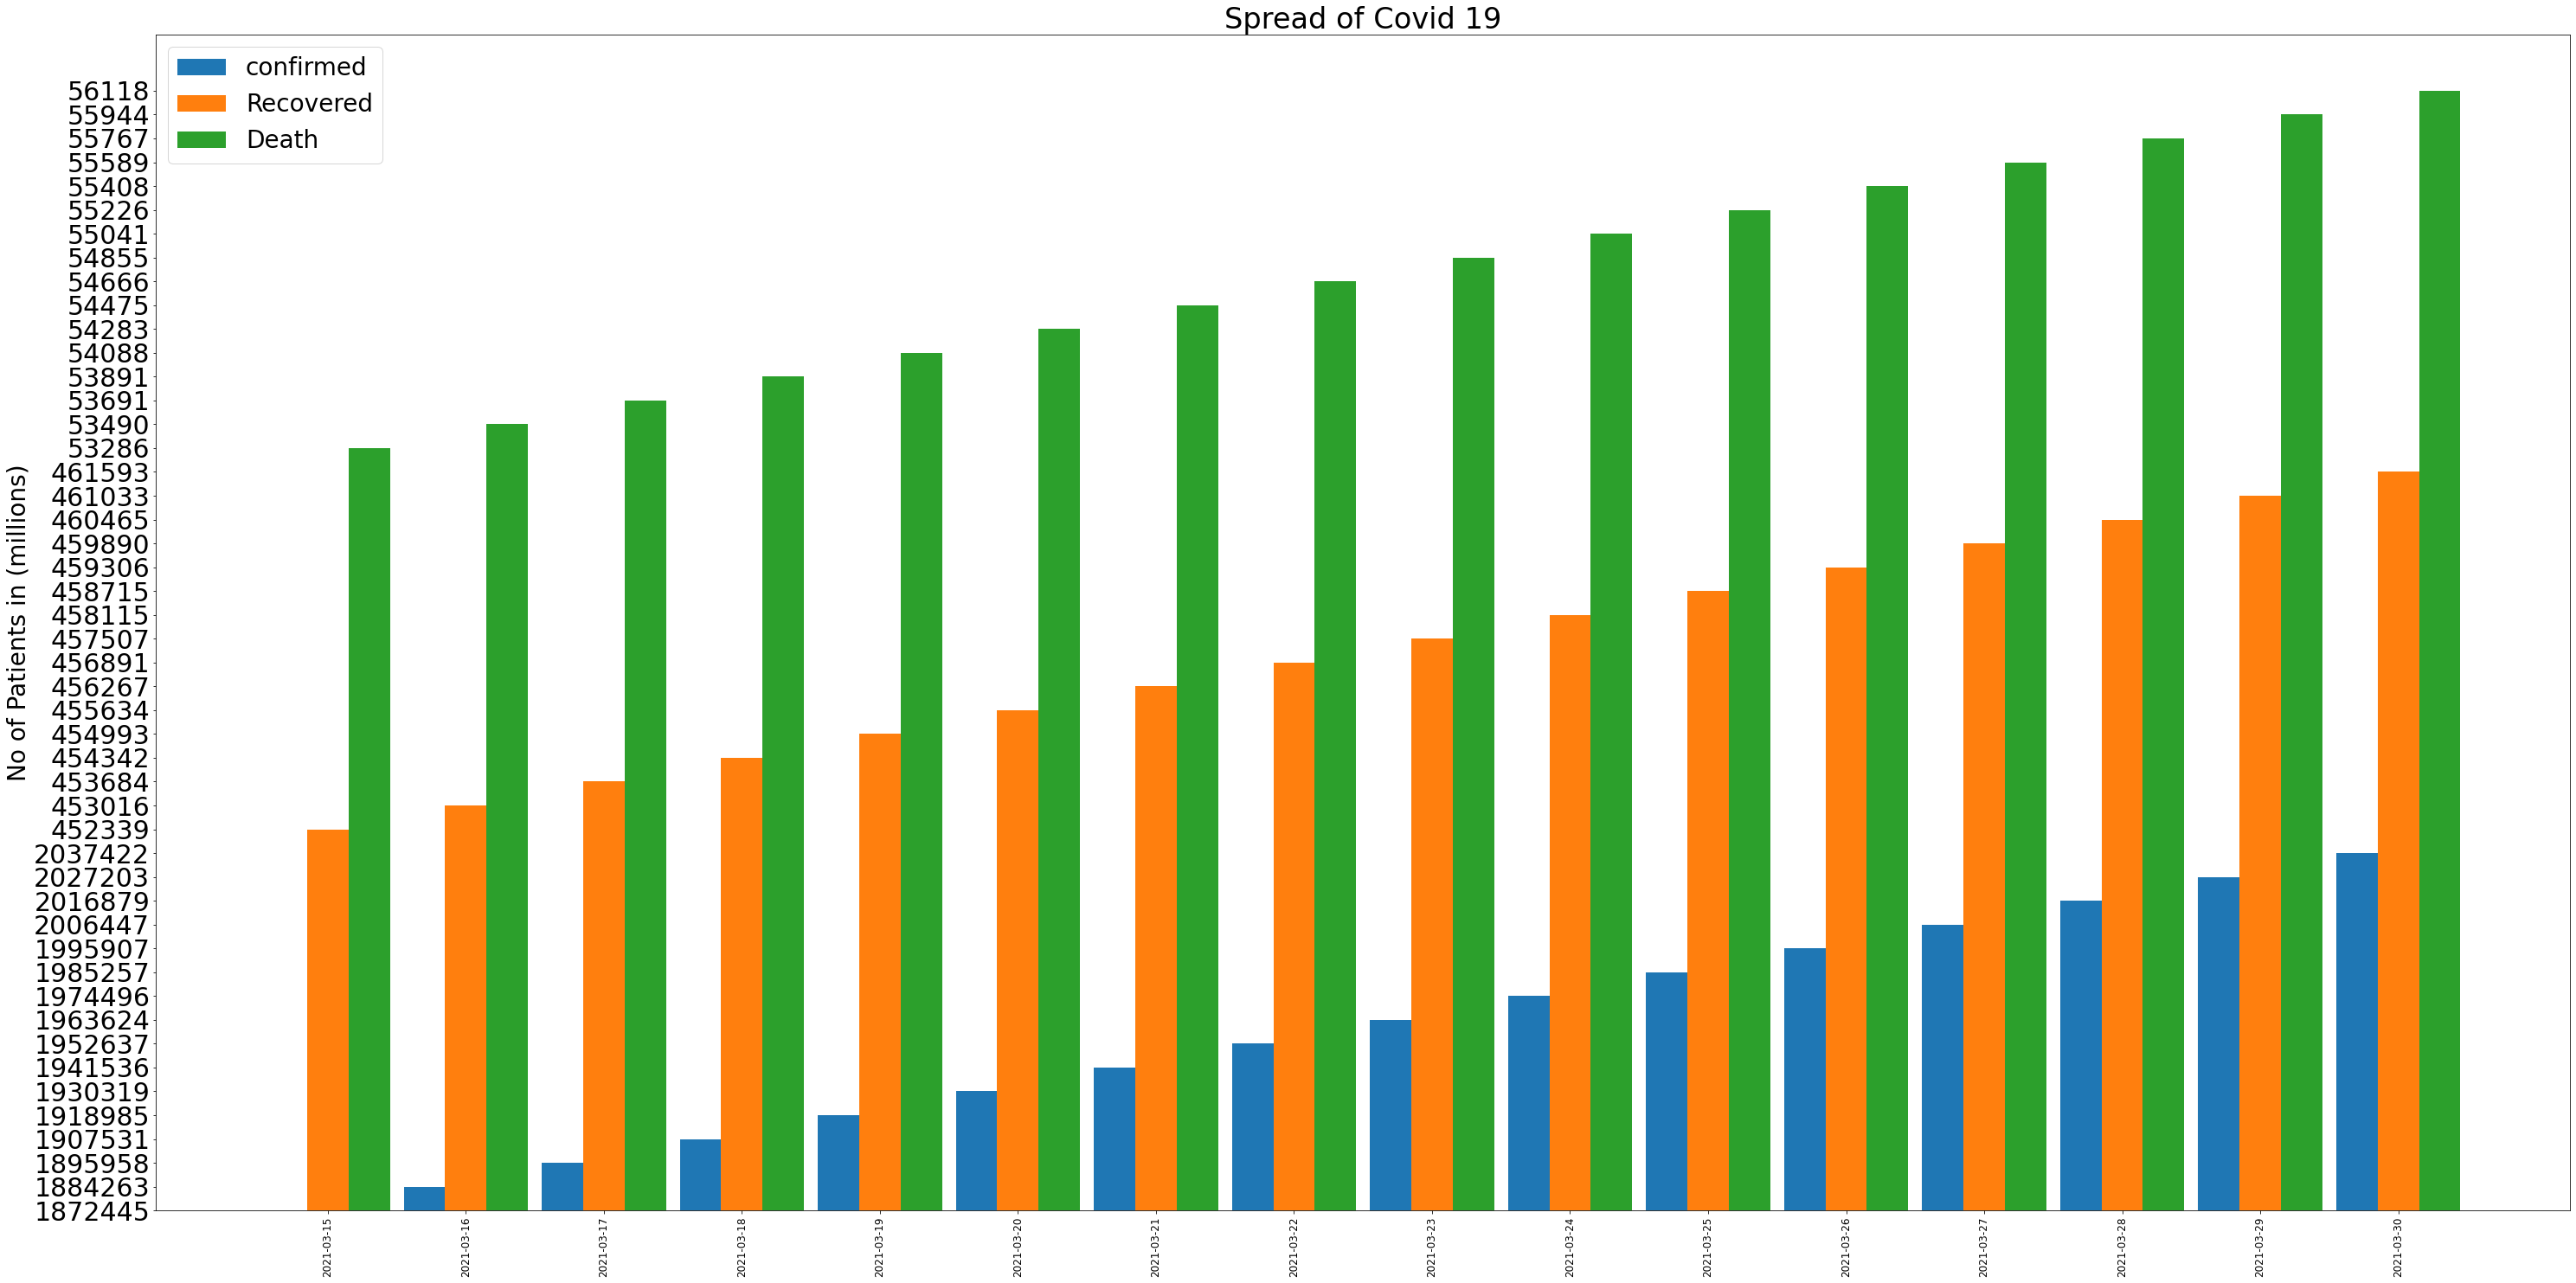

In [17]:
if Debug:
    print(Covid_19_Countires_Wise)
Visualize(val123, 
          ['US'],'Spread of Covid 19','No of Patients in (millions)',vx=50,vy=25,w=.3)

## Prediction Prototype Algorithm
<a class="anchor" id="PredictionPrototypeAlgorithm"></a>

In [18]:
countries = ['Afghanistan','Italy' , 'Kuwait', 'India', 'South Africa' ,'US','Bangladesh', 'Brazil',
             'United Kingdom','Sri Lanka', 'Chile' , 'Norway', 'New Zealand' ,'Switzerland','Ireland','Argentina',
'Australia', 'Canada', 'China','Slovenia','North Macedonia','Zimbabwe','Sweden','Netherlands','Pakistan']


## Covid 19 Data Frame Generated by Time Series Model
<a class="anchor" id="Covid19DataFrameGeneratedbyTimeSeriesModel"></a>

In [19]:
Complete_data_Time_series_model = Complete_Data

if Verbose:
    Complete_data_Time_series_model

## Covid-19 Data Frame 
<a class="anchor" id="Covid19DataFrame"></a>

In [20]:
## Extracting the latest avaialbele data in the Data Frame
length = len(Covid_19_Countires_Wise['Date'])
Latest_date = Covid_19_Countires_Wise['Date'][length-1]

if Verbose:
    print("Size of data is = " +  str(length))
    print("The Latest Date for the Data is = " + Latest_date)

In [21]:
## Loading the Latest data for the clustering

if(TimeSeriesEnable):
    length = len(Complete_data_Time_series_model['Date'])
    Latest_date = Complete_data_Time_series_model['Date'][length-1]
    Complete_Data_for_daily_Analysis = Complete_Data 
    Complete_Data = Complete_data_Time_series_model[Complete_data_Time_series_model['Date'] == Latest_date]
    Complete_Data.fillna(0)
    
else:
    Complete_Data_for_daily_Analysis = Covid_19_Countires_Wise
    Complete_Data = Covid_19_Countires_Wise[Covid_19_Countires_Wise['Date'] == Latest_date]
    Complete_Data.fillna(0)

if Verbose:
    Complete_Data

In [22]:
# Covid Data 
Complete_Data = np.array(Complete_Data)
Complete_Data[:,[2,3,4]] = np.array(Complete_Data[:,[2,3,4]]).astype(int)
selected_countries = np.zeros(shape=(1,4)) 
data = Complete_Data[:,[0,1,2,3,4]]
filter1 = []
for i in countries:
    filter1.clear()
    for j in range(0,len(data[:,0])):
            if(data[j,1] == i):
                filter1.append(True)
            else:
                filter1.append(False)
    Complete_Data = data[filter1]
    for j in range(0,len(Complete_Data[:,0])):
                if(Complete_Data[j,1] == i):
                
                    '''for k in range(0,len(Complete_Data[:,[2]])):
                        w1.append((len(Complete_Data[:,[2]])- k)/len(Complete_Data[:,[2]]))
                                                                                            '''
                    val1 = ((sum(Complete_Data[:,2]))/len(Complete_Data[:,[2]]))
                    val2 = ((sum(Complete_Data[:,3]))/len(Complete_Data[:,[3]]))
                    val3 = ((sum(Complete_Data[:,4]))/len(Complete_Data[:,[4]]))
                    selected_countries = np.append(selected_countries,[str(i),int(val1),int(val2),int(val3)])
                    selected_countries = selected_countries.reshape((int(len(selected_countries)/4)),4)
                    break;
selected_countries   = selected_countries[1:,[0,1,2,3]]


if Verbose:
    print(selected_countries[:,[0,1,2,3]])



In [23]:
 if Debug:
    print(selected_countries[:,[0,1,2,3]])

# Selecting the population of the countries under consideration  
<a class="anchor" id="Selectingthepopulationofthecountriesunderconsideration"></a>

In [24]:
if Verbose:
    Population_Data_Countires_Wise_Descreet

In [25]:
# Covid countries population Data 
Complete_Data_pop = Population_Data_Countires_Wise_Descreet
Complete_Data_pop = np.array(Complete_Data_pop)
Complete_Data_pop[:,[8,9]] = np.array(Complete_Data_pop[:,[8,9]]).astype(int)
selected_countries_pop = np.zeros(shape=(1,3)) 
data = Complete_Data_pop[:,[0,1,2,3,4,5,6,7,8,9]]
filter1 = []
for i in countries:
    filter1.clear()
    for j in range(0,len(data[:,0])):
            if(data[j,1] == i):
                filter1.append(True)
            else:
                filter1.append(False)
    Complete_Data_pop = data[filter1]
    for j in range(0,len(Complete_Data_pop[:,0])):
                if(Complete_Data_pop[j,1] == i):
                
                    '''for k in range(0,len(Complete_Data_pop[:,[2]])):
                        w1.append((len(Complete_Data_pop[:,[2]])- k)/len(Complete_Data_pop[:,[2]]))
                                                                                            '''
                    val1 = ((sum(Complete_Data_pop[:,8]))/len(Complete_Data_pop[:,[8]]))
                    val2 = ((sum(Complete_Data_pop[:,9]))/len(Complete_Data_pop[:,[9]]))
                    selected_countries_pop = np.append(selected_countries_pop,[str(i),int(val1),int(val2)])
                    selected_countries_pop = selected_countries_pop.reshape((int(len(selected_countries_pop)/3)),3)
                    break;
selected_countries_pop   = selected_countries_pop[1:,[0,1,2]]


if Verbose:
    print(selected_countries_pop[:,[0,1,2]])

In [26]:
s_c_pop_df = pd.DataFrame(selected_countries_pop)
s_c_df = pd.DataFrame(selected_countries)
int(s_c_pop_df[s_c_pop_df[0] == 'Afghanistan'][1])
s_c_df_not_norm = s_c_df
if True:
    s_c_df

## Normalising covid data with population 
<a class="anchor" id="Normalisingcoviddatawithpopulation"></a>

In [27]:
for i in range(len(s_c_df)):
    s_c_df[1][i] = (int(s_c_df[1][i])/int(s_c_pop_df[s_c_pop_df[0] == s_c_df[0][i] ][1]))*0.1 ## population data values are in thousands
    s_c_df[2][i] = (int(s_c_df[2][i])/int(s_c_pop_df[s_c_pop_df[0] == s_c_df[0][i] ][1]))*0.1 ## population data values are in thousands
    s_c_df[3][i] = (int(s_c_df[3][i])/int(s_c_pop_df[s_c_pop_df[0] == s_c_df[0][i] ][1]))*0.1 ## population data values are in thousands
    

In [28]:
s_c_df = np.array(s_c_df)
selected_countries = s_c_df
if Debug:
    print(selected_countries)

In [29]:
#clustering = DBSCAN(eps=300, min_samples=5).fit(selected_countries[:,[1,2,3]])
clustering = KMeans(n_clusters=6, random_state=0).fit(selected_countries[:,[1,2,3]])  # Converted no of Clusters from 5 -->3
clustering.labels_
clus = list(clustering.labels_)
covid_frame = list(zip(countries,clus))
covid_frame1 = list(zip(selected_countries[:,[1]].tolist(),selected_countries[:,[2]].tolist(),selected_countries[:,[3]].tolist(),clus))
covid_frame1_data = covid_frame1
if Debug:
    print(covid_frame)
    print(covid_frame1)

In [30]:
## Dimensionality Reduction for clusters to plot Graphs in 2D

x = selected_countries[:,[1,2,3]]
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principleDf_Array = np.array(principalDf)
principleDf_Array[:,[0,1]].tolist()
covid_frame1 = list(zip(principleDf_Array[:,[0]].tolist(),principleDf_Array[:,[1]].tolist(),clus))
if Debug:
    print(covid_frame1)

# Covid-19 Clusters Plot
<a class="anchor" id="Covid19ClustersPlot"></a>

([[0.031046633013293454], [0.03861404732609012], [-0.07073792712570226]], [[-0.048284337105394405], [0.02547822584912069], [-0.03597203949088533]])
([[0.43493425986454015], [0.3247563366095809], [0.4555028072370354]], [[-0.09937225970719452], [-0.07146940243548776], [-0.10949491506553405]])
([[-0.0047558470292751905], [0.03187711123593058], [0.018428264349401043]], [[0.16333475515979146], [0.19059928951180014], [0.1752577653887774]])
([[-0.24206244486533263], [-0.16652264696505215], [-0.21694990586607274], [-0.25507004893967433], [-0.15936468043673632], [-0.25576715076355966], [-0.24419505144732948], [-0.26841400867214665], [-0.2575123637151078], [-0.22773141579365405]], [[-0.025565977612916194], [-0.03668846129331827], [-0.02610364957885217], [-0.0271734194026533], [-0.009856113427258258], [-0.02805310491791653], [-0.026611854539116], [-0.026576756839643948], [-0.02669605240752904], [-0.029350209256439812]])
([[0.08520951699924857], [0.204848540623782], [0.16969348831837014], [0.15344

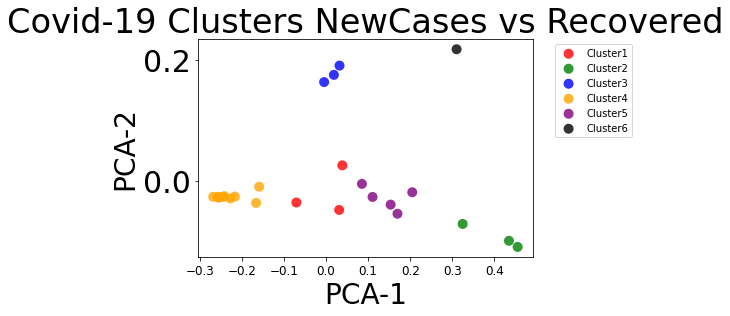

In [31]:
# Visulaize  Clusters 

title = 'Covid-19 Clusters NewCases vs Recovered'
xlabel = 'PCA-1'
ylabel = 'PCA-2'
zlabel = "cases_detected"
plot_cluster(covid_frame1,title,xlabel,ylabel)

In [32]:
# Auto Labeling of CLusters
if(Debug):
    print(selected_countries_pop[:,[0,1,2]])

## Labeling Criterion for Covid Data
<a class="anchor" id="LabelingCriterionforCovidData"></a>
* Cluster 0 ------> Severity 0 Lowest  
* Cluster 1 ------> Severity 5 Extream 
* Cluster 2 ------> Severity 1 Lower   
* Cluster 3 ------> Severity 4 Highest 
* Cluster 4 ------> Severity 3 High 
* Cluster 5 ------> Severity 2 Medium 

In [33]:
data_covid = pd.DataFrame(np.array(covid_frame1_data),columns=['Total_cases','Recovered','Deaths','cluster'])
_,labeled_clus_covid = auto_labeler(data_covid,[-1,1,-1])

Cluster Mean Values [[0.22486606905108789, 0.15236209957369265, 0.008441330335034077, 0.0], [0.5121877221945792, 0.4477816847239046, 0.010370452998069069, 1.0], [0.3510787172574948, 0.0018846026956048235, 0.017415189691370368, 2.0], [0.03472826500466801, 0.024764220952646365, 0.0006378913047879935, 3.0], [0.3374599669326028, 0.24428561706275126, 0.011874201381241494, 4.0], [0.6155316282076846, 0.13945323593210918, 0.016953976108905686, 5.0]]
3
Final Cumlative Cluster Scores[-0.08094529981242932, -0.07477649046874366, -0.3666093042532603, -0.010601935356809639, -0.10504855125109301, -0.4930323683844811]
Final Cumlative Cluster Scores sorted [-0.4930323683844811, -0.3666093042532603, -0.10504855125109301, -0.08094529981242932, -0.07477649046874366, -0.010601935356809639]
Labeled Cluster:- [5, 2, 4, 0, 1, 3]

Cluster Auto Labeling 

Cluster 5 ------> Susceptibility Sever-1 


Cluster 2 ------> Susceptibility Sever-2 


Cluster 4 ------> Susceptibility Sever-3 


Cluster 0 ------> Suscepti

<ipython-input-33-ad21a0d087ec>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  data_covid = pd.DataFrame(np.array(covid_frame1_data),columns=['Total_cases','Recovered','Deaths','cluster'])


In [34]:
if Verbose:
    print(list(zip(selected_countries[:,[0]].tolist(),clus)))

In [35]:
if Debug:
    print(s_c_df_not_norm)

## Covid19 Daily Data Analysis 
<a class="anchor" id="Covid19DailyDataAnalysis"></a>

In [36]:

## Checking for TimeSeriesEnable Flag

if(TimeSeriesEnable):
    Analysis_window = Analysis_window + No_of_days_To_Predict
    
    new_df =  Covid_19_Countires_Wise.append(Complete_Data_for_daily_Analysis)
    if Debug:
        print(new_df)
        print(Complete_Data_for_daily_Analysis)
        print(Covid_19_Countires_Wise)

if Verbose:
    print(Complete_Data_for_daily_Analysis)

In [37]:
new_df

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0
...,...,...,...,...,...
3067,2021-03-26,India,1081409,942632,17412
3068,2021-03-27,India,1086591,947599,17486
3069,2021-03-28,India,1091720,952514,17559
3070,2021-03-29,India,1096795,957379,17632


In [38]:
new_df['Date'] = pd.to_datetime(new_df['Date'],format='%Y-%m-%d')
new_df

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0
...,...,...,...,...,...
3067,2021-03-26,India,1081409,942632,17412
3068,2021-03-27,India,1086591,947599,17486
3069,2021-03-28,India,1091720,952514,17559
3070,2021-03-29,India,1096795,957379,17632


In [39]:
## Generating new data frame for the specified range 

lowerbound_date =  Data_range_selector(Latest_date,Analysis_window)


lowerbound_date = datetime.strptime(lowerbound_date.replace('-','/'), '%Y/%M/%d')

if TimeSeriesEnable:
    data_dpecific_rangelower = new_df[new_df['Date'] >= lowerbound_date]
else:
    data_dpecific_rangelower = Complete_Data_for_daily_Analysis[Complete_Data_for_daily_Analysis['Date'] >= lowerbound_date]


if(Debug):
    print(data_dpecific_rangelower)

In [40]:
print(lowerbound_date)
data_dpecific_rangelower

2021-01-05 00:03:00


,Date,Country,Confirmed,Recovered,Deaths
350,2021-01-06,Afghanistan,53105,42666,2244
351,2021-01-07,Afghanistan,53207,43291,2253
352,2021-01-08,Afghanistan,53332,43440,2257
353,2021-01-09,Afghanistan,53400,43740,2264
354,2021-01-10,Afghanistan,53489,43948,2277
...,...,...,...,...,...
3067,2021-03-26,India,1081409,942632,17412
3068,2021-03-27,India,1086591,947599,17486
3069,2021-03-28,India,1091720,952514,17559
3070,2021-03-29,India,1096795,957379,17632


In [41]:
Complete_Data = np.array(data_dpecific_rangelower)
Complete_Data[:,[2,3,4]] = np.array(Complete_Data[:,[2,3,4]]).astype(int)

selected_countries = np.zeros(shape=(1,4)) 
data = Complete_Data[:,[0,1,2,3,4]]
filter1 = []
for i in countries:
    filter1.clear()
    for j in range(0,len(data[:,0])):
            if(data[j,1] == i):
                filter1.append(True)
            else:
                filter1.append(False)
    Complete_Data = data[filter1]
    for j in range(0,len(Complete_Data[:,0])):
                if(Complete_Data[j,1] == i):
                
                    '''for k in range(0,len(Complete_Data[:,[2]])):
                        w1.append((len(Complete_Data[:,[2]])- k)/len(Complete_Data[:,[2]]))
                                                                                            '''
                    val1 = ((sum(Complete_Data[:,2]))/len(Complete_Data[:,[2]]))
                    val2 = ((sum(Complete_Data[:,3]))/len(Complete_Data[:,[3]]))
                    val3 = ((sum(Complete_Data[:,4]))/len(Complete_Data[:,[4]]))
                    selected_countries = np.append(selected_countries,[str(i),int(val1),int(val2),int(val3)])
                    selected_countries = selected_countries.reshape((int(len(selected_countries)/4)),4)
                    break;
date_dpecific_average   = selected_countries[1:,[0,1,2,3]]


if Verbose:
    print(date_dpecific_average[:,[0,1,2,3]])

In [42]:
if Debug:
    date_dpecific_average

In [43]:
s_c_pop_df = pd.DataFrame(selected_countries_pop)
s_c_df = pd.DataFrame(date_dpecific_average)
int(s_c_pop_df[s_c_pop_df[0] == 'Afghanistan'][1])
s_c_df_not_norm = s_c_df
if True:
    s_c_df

In [44]:
for i in range(len(s_c_df)):
    s_c_df[1][i] = (int(s_c_df[1][i])/int(s_c_pop_df[s_c_pop_df[0] == s_c_df[0][i] ][1]))*0.1 ## population data values are in thousands
    s_c_df[2][i] = (int(s_c_df[2][i])/int(s_c_pop_df[s_c_pop_df[0] == s_c_df[0][i] ][1]))*0.1 ## population data values are in thousands
    s_c_df[3][i] = (int(s_c_df[3][i])/int(s_c_pop_df[s_c_pop_df[0] == s_c_df[0][i] ][1]))*0.1 ## population data values are in thousands
    

In [45]:
s_c_df = np.array(s_c_df)
date_dpecific_average = s_c_df
if Debug:
    print(date_dpecific_average)

In [46]:
#clustering = DBSCAN(eps=300, min_samples=5).fit(selected_countries[:,[1,2,3]])
clustering = KMeans(n_clusters=4, random_state=0).fit(date_dpecific_average[:,[1,2,3]])  # Converted no of Clusters from 5 -->3
clustering.labels_
clus = list(clustering.labels_)
covid_frame_daily = list(zip(countries,clus))
covid_frame1_daily = list(zip(date_dpecific_average[:,[1]].tolist(),date_dpecific_average[:,[2]].tolist(),date_dpecific_average[:,[3]].tolist(),clus))
covid_frame1_data_daily = covid_frame1_daily
if Debug:
    print(covid_frame_daily)
    print(covid_frame1_daily)

In [47]:
## Dimensionality Reduction for clusters to plot Graphs in 2D
selected_countries = date_dpecific_average
x = selected_countries[:,[1,2,3]]
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principleDf_Array = np.array(principalDf)
principleDf_Array[:,[0,1]].tolist()
covid_frame1_daily = list(zip(principleDf_Array[:,[0]].tolist(),principleDf_Array[:,[1]].tolist(),clus))
if Debug:
    print(covid_frame1_daily)

## Covid-19 Daily Average Clusters Plot
<a class="anchor" id="Covid19DailyClustersPlot"></a>

([[-2.7439622228598135], [-2.0159332560120373], [-0.2514846550616772], [-2.5391144966809347], [-2.5478665845088013], [-1.8977556913347564], [-2.8430473957276705], [-2.777700323657905], [-0.582540591748726], [-2.8905022553248867], [-2.6708276299023685], [-2.619454812422833]], [[-0.17626986087992402], [-0.35739185413271224], [-0.6733512275456108], [-0.21971516978661848], [-0.22090667343971931], [0.12290215780693833], [-0.16213422032327132], [-0.16515474579742573], [-0.6239142569708097], [-0.15111841138887877], [-0.18285925597037805], [-0.2085052165345289]])
([[1.6882619551059777], [1.6943707429981032], [2.0201155006042404], [1.5237822688467968], [2.971790179699947], [1.8309993885946698], [2.050692807155105]], [[-0.7498915123103254], [-1.1681570590063068], [-1.087668961366223], [-1.1264438340824316], [-0.1675363745447254], [-1.067751737215122], [-1.0309337162374246]])
([[2.800535319716286], [1.09714098713479], [0.13653985884327344], [1.271216632336047], [1.332524640934586]], [[3.215537836

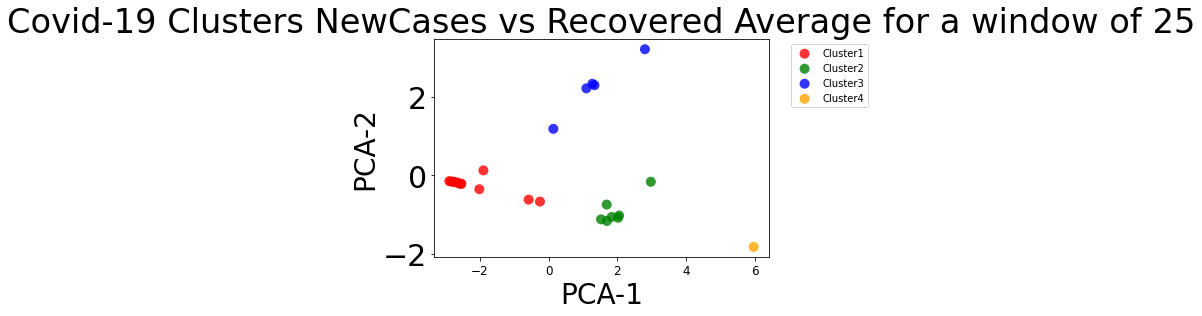

In [48]:
# Visulaize  Clusters 

title = 'Covid-19 Clusters NewCases vs Recovered Average for a window of ' + str(Analysis_window)
xlabel = 'PCA-1'
ylabel = 'PCA-2'
zlabel = "cases_detected"
plot_cluster(covid_frame1_daily,title,xlabel,ylabel)

## Labeling Criterion for Covid Data Daily
* Cluster 0 ------> Severity 0 Lowest  
* Cluster 1 ------> Severity 5 Extream 
* Cluster 2 ------> Severity 1 Lower   
* Cluster 3 ------> Severity 4 Highest 
* Cluster 4 ------> Severity 3 High 
* Cluster 5 ------> Severity 2 Medium 

In [49]:
data_covid_daily = pd.DataFrame(np.array(covid_frame1_data_daily),columns=['Total_cases','Recovered','Deaths','cluster'])
_,labeled_clus_covid_daily = auto_labeler(data_covid_daily,[-1,1,-1])

Cluster Mean Values [[0.5492261174583118, 0.4462350207048418, 0.012561578407023738, 0.0], [3.7890378971510854, 3.148103985814805, 0.0881498599118485, 1.0], [4.857675697667632, 0.10217125872940014, 0.09601512883972751, 2.0], [6.75, 5.98022136669875, 0.13984600577478346, 3.0]]
3
Final Cumlative Cluster Scores[-0.1155526751604938, -0.7290837712481287, -4.8515195677779595, -0.9096246390760336]
Final Cumlative Cluster Scores sorted [-4.8515195677779595, -0.9096246390760336, -0.7290837712481287, -0.1155526751604938]
Labeled Cluster:- [2, 3, 1, 0]

Cluster Auto Labeling 

Cluster 2 ------> Susceptibility Sever-1 


Cluster 3 ------> Susceptibility Sever-2 


Cluster 1 ------> Susceptibility Sever-3 


Cluster 0 ------> Susceptibility Sever-4 




<ipython-input-49-e90bff68e0e8>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  data_covid_daily = pd.DataFrame(np.array(covid_frame1_data_daily),columns=['Total_cases','Recovered','Deaths','cluster'])


In [50]:
def manual_cluster_fn(ratio):
    if ratio<5:
        return 0
    elif ratio<10:
        return 1
    elif ratio<20:
        return 3
    return 2

manually_labelled_covid_df = data_covid_daily
manually_labelled_covid_df['c_r100'] = manually_labelled_covid_df.apply(lambda row: (row.Total_cases-row.Recovered)/100 if row.Recovered!=0 else row.Total_cases, axis=1)
manually_labelled_covid_df['d_100'] = manually_labelled_covid_df.apply(lambda row: row.Deaths/100, axis=1)
manually_labelled_covid_df['final'] = manually_labelled_covid_df.apply(lambda row: row.c_r100/row.d_100, axis=1)
manually_labelled_covid_df['cluster'] = manually_labelled_covid_df.apply(lambda row: manual_cluster_fn(row.final), axis=1)
manually_labelled_covid_df['Country'] = countries
# print(manually_labelled_covid_df)
print(manually_labelled_covid_df[['Country', 'cluster']])
manual_covid_frame_cluster = manually_labelled_covid_df['cluster'].tolist()
manual_covid_frame = list(zip(countries, manual_covid_frame_cluster))
print(manual_covid_frame)

            Country  cluster
0       Afghanistan        0
1             Italy        1
2            Kuwait        3
3             India        0
4      South Africa        0
5                US        2
6        Bangladesh        1
7            Brazil        0
8    United Kingdom        2
9         Sri Lanka        3
10            Chile        0
11           Norway        2
12      New Zealand        0
13      Switzerland        2
14          Ireland        2
15        Argentina        0
16        Australia        1
17           Canada        0
18            China        0
19         Slovenia        1
20  North Macedonia        0
21         Zimbabwe        1
22           Sweden        2
23      Netherlands        2
24         Pakistan        0
[('Afghanistan', 0), ('Italy', 1), ('Kuwait', 3), ('India', 0), ('South Africa', 0), ('US', 2), ('Bangladesh', 1), ('Brazil', 0), ('United Kingdom', 2), ('Sri Lanka', 3), ('Chile', 0), ('Norway', 2), ('New Zealand', 0), ('Switzerland', 2), ('Irel

## Population data based on classification of Age groups
<a class="anchor" id="PopulationdatabasedonclassificationofAgegroups"></a>
### 1. Age 0-16
### 2. Age 17-45
### 3. Age 46-60
### 4. Age 61+

In [51]:
selected_countries = np.array(Population_Data_Age_Wise)
if Debug:
    selected_countries

In [52]:
## Clustering

clustering = KMeans(n_clusters=4, random_state=0).fit(selected_countries[:,[1,2,3,4]])
clustering.labels_
clus = list(clustering.labels_)
age_frame = list(zip(countries,clus))
age_frame1 = list(zip(selected_countries[:,[2]].tolist(),selected_countries[:,[3]].tolist(),clus))
age_frame2 = list(zip(selected_countries[:,[1]].tolist(),selected_countries[:,[2]].tolist(),selected_countries[:,[3]].tolist(),selected_countries[:,[4]].tolist(),clus))
if Debug:
    print(age_frame)
    print("-------------------------cluster data wise---------------------------------------")
    print(age_frame1)
    print("-------------------------------------------------------------------------------")
    print(age_frame2)

if Verbose:
    pd.DataFrame(np.array(age_frame2),columns=['Age 0-16','Age 17-45','Age 46-60','Age 61-100','cluster'])

In [53]:
pd.DataFrame(np.array(age_frame2),columns=['Age 0-16','Age 17-45','Age 46-60','Age 61-100','cluster'])

<ipython-input-53-b3ffe7048f8e>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  pd.DataFrame(np.array(age_frame2),columns=['Age 0-16','Age 17-45','Age 46-60','Age 61-100','cluster'])


,Age 0-16,Age 17-45,Age 46-60,Age 61-100,cluster
0,[17104],[15373],[3019],[1566],0
1,[8538],[19271],[14347],[17758],0
2,[947],[1997],[939],[236],0
3,[389054],[614122],[203095],[134805],1
4,[17945],[26746],[7945],[4902],0
5,[65240],[123131],[62685],[73663],2
6,[47493],[76055],[23698],[12599],2
7,[47528],[93943],[37617],[28638],2
8,[12668],[24331],[13483],[16265],0
9,[5442],[8254],[3869],[3377],0


In [54]:
## Dimensionality Reduction for clusters to plot Graphs in 2D


x = selected_countries[:,[1,2,3,4]]
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principleDf_Array = np.array(principalDf)
principleDf_Array[:,[0,1]].tolist()
age_frame1 = list(zip(principleDf_Array[:,[0]].tolist(),principleDf_Array[:,[1]].tolist(),clus))

if Debug:
    print(age_frame1)

# Age groups Classification Clusters Plot
<a class="anchor" id="AgegroupsClassificationClustersPlot"></a>

([[-68109.8190633623], [-60719.40652620899], [-86790.31876104884], [-56216.516854110414], [-55613.76165642733], [-78069.3761892628], [-79115.00386997395], [-86487.5436380238], [-86789.20780146182], [-84945.15236106429], [-86692.41889109439], [-65294.645132198406], [-76347.73556604127], [-70442.57390000904], [-88184.5974406421], [-88109.39326867048], [-81060.28400366816], [-84260.26566183749], [-80906.444253213]], [[-8220.440425139494], [11580.609942262457], [485.18654995511315], [-5618.472205665277], [7209.664957273628], [630.8645820839295], [1182.9318439590677], [1077.9770623420088], [927.6010010901782], [1719.7682509361828], [805.4086651098609], [-557.4781937223721], [2208.1169097478687], [4688.0431501624635], [882.2546508686362], [751.3362805038715], [-2738.3824875909268], [1636.8807249675967], [2828.8815842575723]])
([[670318.4837470952]], [[-104751.47867809719]])
([[76996.96414317371], [3042.6139857755234], [26085.84024356946], [31638.06928154107]], [[25299.161350511713], [-15221.

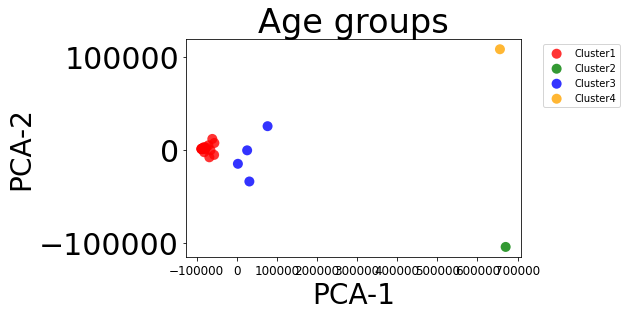

In [55]:
# Visulaize  Clusters 
title = 'Age groups'
xlabel = 'PCA-1'
ylabel = 'PCA-2'
zlabel = 'Classification based on population Age groups'
plot_cluster(age_frame1,title,xlabel,ylabel)
#plot_cluster_3d(hiv_frame2,title,xlabel,ylabel,zlabel)

# Cluste Labeling :- Age groups
<a class="anchor" id="ClusteLabelingAgegroups"></a>
* Cluster 0 ------> Severity 1 Lower Susceptibility
* Cluster 1 ------> Severity 3 Higher Susceptibility
* Cluster 2 ------> Severity 2 Moderate Susceptibility
* Cluster 3 ------> Severity 4 Critical Susceptibility

In [56]:
data_pop = pd.DataFrame(np.array(age_frame2),columns=['Age_0_16','Age_17_45','Age_46_60','Age_61_100','cluster'])
_,labeled_clus_pop = auto_labeler(data_pop,[1,1,-1,-1])

Cluster Mean Values [[5586.315789473684, 9020.315789473685, 4157.0526315789475, 4341.0, 0.0], [389054.0, 614122.0, 203095.0, 134805.0, 1.0], [60154.75, 96622.0, 37010.75, 32313.75, 2.0], [271674.0, 566334.0, 337896.0, 241371.0, 3.0]]
4
Final Cumlative Cluster Scores[6108.5789473684235, 665276.0, 87452.25, 258741.0]
Final Cumlative Cluster Scores sorted [6108.5789473684235, 87452.25, 258741.0, 665276.0]
Labeled Cluster:- [0, 2, 3, 1]

Cluster Auto Labeling 

Cluster 0 ------> Susceptibility Sever-1 


Cluster 2 ------> Susceptibility Sever-2 


Cluster 3 ------> Susceptibility Sever-3 


Cluster 1 ------> Susceptibility Sever-4 




<ipython-input-56-42385e2c6143>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  data_pop = pd.DataFrame(np.array(age_frame2),columns=['Age_0_16','Age_17_45','Age_46_60','Age_61_100','cluster'])


# Co-morbidities Dataframe Clustering
<a class="anchor" id="ComorbiditiesDataframeClustering"></a>

## HIV
<a class="anchor" id="HIV"></a>

In [57]:
## Check the List of Countries avaialable
#HIV_Countires_Wise = pd.read_csv('../HIV infected Population/Data_Extract_From_Health_Nutrition_and_Population_Statistics/c600116a-af72-4faa-945a-ab00ddddb96e_Data.csv')

## Columns renaming for Uniformity

#------------------------------------------------------------
HIV_Countires_Wise_complete = HIV_Countires_Wise
# HIV Data 
HIV_Countires_Wise_complete = np.array(HIV_Countires_Wise_complete)
HIV_Countires_Wise_complete[:,[2,3,4]] = np.array(HIV_Countires_Wise_complete[:,[2,3,4]]).astype(int)
selected_countries = np.zeros(shape=(1,4)) 
data_hiv = HIV_Countires_Wise_complete[:,[0,1,2,3,4]]
filter2 = []
for i in countries:
    filter2.clear()
    for j in range(0,len(data_hiv[:,0])):
            if(data_hiv[j,0] == i):
                filter2.append(True)
            else:
                filter2.append(False)
    HIV_Countires_Wise_complete = data_hiv[filter2]
    for j in range(0,len(HIV_Countires_Wise_complete[:,0])):
                if(HIV_Countires_Wise_complete[j,0] == i):
                    val1 = ((sum(HIV_Countires_Wise_complete[:,2]))/len(HIV_Countires_Wise_complete[:,[2]]))
                    val2 = ((sum(HIV_Countires_Wise_complete[:,3]))/len(HIV_Countires_Wise_complete[:,[3]]))
                    val3 = ((sum(HIV_Countires_Wise_complete[:,4]))/len(HIV_Countires_Wise_complete[:,[4]]))
                    selected_countries = np.append(selected_countries,[str(i),int(val1),int(val2),int(val3)])
                    selected_countries = selected_countries.reshape((int(len(selected_countries)/4)),4)
                    break;
selected_countries   = selected_countries[1:,[0,1,2,3]]


if Debug:
    print(selected_countries[:,[0,1,2,3]])

In [58]:
clustering = KMeans(n_clusters=2, random_state=0).fit(selected_countries[:,[1,2,3]])
clustering.labels_
clus = list(clustering.labels_)
hiv_frame = list(zip(countries,clus))

hiv_frame1 = list(zip(selected_countries[:,[2]].tolist(),selected_countries[:,[3]].tolist(),clus))
hiv_frame2 = list(zip(selected_countries[:,[1]].tolist(),selected_countries[:,[2]].tolist(),selected_countries[:,[3]].tolist(),clus))
if Debug:
    print(hiv_frame)
    print("-------------------------cluster data wise---------------------------------------")
    print(hiv_frame1)
    print("-------------------------------------------------------------------------------")
    print(hiv_frame2)
if Verbose:
    pd.DataFrame(np.array(hiv_frame2),columns=['val1','val2','val3','cluster'])

In [59]:
## Dimensionality Reduction for clusters to plot Graphs in 2D


x = selected_countries[:,[1,2,3]]
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principleDf_Array = np.array(principalDf)
principleDf_Array[:,[0,1]].tolist()
hiv_frame1 = list(zip(principleDf_Array[:,[0]].tolist(),principleDf_Array[:,[1]].tolist(),clus))

if Debug:
    hiv_frame1

## HIV Cluster Plot
<a class="anchor" id="HHIVClusterPlot"></a>

([[-628129.2712943511], [-414583.2801206408], [-638662.2947240442], [-639736.4113738163], [-639736.4113738163], [-617221.0982484987], [-639736.4113738163], [-524661.7766742052], [-633761.9671808167], [-521059.3546236722], [-629776.941662745], [-633587.2254224139], [-639736.4113738163], [-627609.687145306], [-405846.1922005001], [-592100.1291676812], [-639736.4113738163], [-639736.4113738163], [-639736.4113738163], [-638870.4377920734], [1438600.184809342], [-639736.4113738163], [-613269.2453929058], [-379789.6326454997]], [[-2427.4475721103668], [15.332049950642817], [-2298.170222941825], [-2282.8239550832923], [-2282.8239550832923], [-2053.008354579908], [-2282.8239550832923], [39274.72074921654], [-2156.067669858827], [-4360.21054543674], [-2246.9415076438377], [-2285.8333784982683], [-2282.8239550832923], [-2422.1441351758053], [-6472.9533820214565], [-2454.343174158058], [-2282.8239550832855], [-2282.8239550832855], [-2282.8239550832855], [-2273.9848935254972], [18930.92378369164],

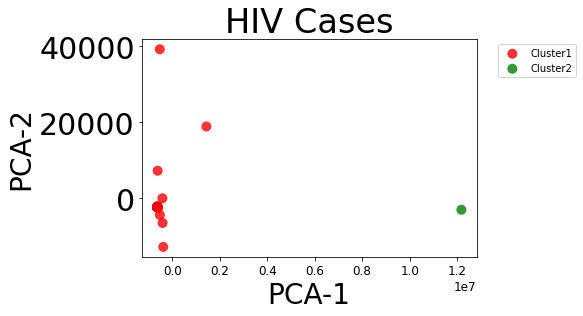

In [60]:
# Visulaize  Clusters 
title = 'HIV Cases'
xlabel = 'PCA-1'
ylabel = 'PCA-2'
zlabel = '2016 HIV CASE'
plot_cluster(hiv_frame1,title,xlabel,ylabel)
#plot_cluster_3d(hiv_frame2,title,xlabel,ylabel,zlabel)

## Cluste Labeling :- HIV Cases
<a class="anchor" id="ClusteLabelingHIVCases"></a>
* Cluster 0 ------> Severity 1 Lower Prevelance
* Cluster 1 ------> Severity 2 High Prevelance


In [61]:
data_Hiv = pd.DataFrame(np.array(hiv_frame2),columns=['2017_cases','2018_cases','2019_cases','cluster'])
_,labeled_clus_hiv = auto_labeler(data_Hiv,[-1,-1,-1])

Cluster Mean Values [[77337.5, 76314.16666666667, 75544.58333333333, 0.0], [7300000.0, 7500000.0, 7400000.0, 1.0]]
3
Final Cumlative Cluster Scores[-229196.25, -22200000.0]
Final Cumlative Cluster Scores sorted [-22200000.0, -229196.25]
Labeled Cluster:- [1, 0]

Cluster Auto Labeling 

Cluster 1 ------> Susceptibility Sever-1 


Cluster 0 ------> Susceptibility Sever-2 




<ipython-input-61-a830a760d75a>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  data_Hiv = pd.DataFrame(np.array(hiv_frame2),columns=['2017_cases','2018_cases','2019_cases','cluster'])


## Blood Pressure
<a class="anchor" id="BloodPressure"></a>

In [62]:
BP_Male_Data = Blood_Pressure_Countires_Wise[(Blood_Pressure_Countires_Wise['Sex']=='Men') & 
                                             (Blood_Pressure_Countires_Wise['Year']==2015)]
#BP_Male_Data = Blood_Pressure_Countires_Wise[Blood_Pressure_Countires_Wise['Year']==2015]

if Verbose:
    BP_Male_Data

In [63]:
## Check the List of Countries avaialable

## Columns renaming for Uniformity
BP_Male_Data = Blood_Pressure_Countires_Wise[(Blood_Pressure_Countires_Wise['Sex']=='Men') & 
                                             (Blood_Pressure_Countires_Wise['Year']==2015)]

BP_Female_Data =Blood_Pressure_Countires_Wise[(Blood_Pressure_Countires_Wise['Sex']=='Women') & 
                                             (Blood_Pressure_Countires_Wise['Year']==2015)]
#------------------------------------------------------------
Blood_Pressure_Countires_Wise_complete = BP_Male_Data
# BP Data 
Blood_Pressure_Countires_Wise_complete = np.array(Blood_Pressure_Countires_Wise_complete)
Blood_Pressure_Countires_Wise_complete[:,[4,5,6]] = np.array(Blood_Pressure_Countires_Wise_complete[:,[4,5,6]]).astype(float)
selected_countries = np.zeros(shape=(1,4)) 
data_bp = Blood_Pressure_Countires_Wise_complete[:,[0,1,2,3,4,5,6]]

if Debug:
    print(data_bp)
    
filter2 = []
for i in countries:
    filter2.clear()
    for j in range(0,len(data_bp[:,0])):
            if(data_bp[j,0] == i):
                filter2.append(True)
            else:
                filter2.append(False)
    Blood_Pressure_Countires_Wise_complete = data_bp[filter2]
    for j in range(0,len(Blood_Pressure_Countires_Wise_complete[:,0])):
                if(Blood_Pressure_Countires_Wise_complete[j,0] == i):
                    val1 = ((sum(Blood_Pressure_Countires_Wise_complete[:,4]))/len(Blood_Pressure_Countires_Wise_complete[:,[4]]))
                    val2 = ((sum(Blood_Pressure_Countires_Wise_complete[:,5]))/len(Blood_Pressure_Countires_Wise_complete[:,[5]]))
                    val3 = ((sum(Blood_Pressure_Countires_Wise_complete[:,6]))/len(Blood_Pressure_Countires_Wise_complete[:,[6]]))
                    selected_countries = np.append(selected_countries,[str(i),float(val1),float(val2),float(val3)])
                    selected_countries = selected_countries.reshape((int(len(selected_countries)/4)),4)
                    break;
selected_countries_male   = selected_countries[1:,[0,1,2,3]]
if Debug:
    print("-----------------------------------------MALE DATA-------------------------------------------------")
    print(selected_countries_male[:,[0,1,2,3]])

#-----------------------------------------------------------------------------------------------------------------------

Blood_Pressure_Countires_Wise_complete = BP_Female_Data
# BP Data 
Blood_Pressure_Countires_Wise_complete = np.array(Blood_Pressure_Countires_Wise_complete)
Blood_Pressure_Countires_Wise_complete[:,[4,5,6]] = np.array(Blood_Pressure_Countires_Wise_complete[:,[4,5,6]]).astype(float)
selected_countries = np.zeros(shape=(1,4)) 
data_bp = Blood_Pressure_Countires_Wise_complete[:,[0,1,2,3,4,5,6]]

if Debug:
    print(data_bp)
    
filter2 = []
for i in countries:
    filter2.clear()
    for j in range(0,len(data_bp[:,0])):
            if(data_bp[j,0] == i):
                filter2.append(True)
            else:
                filter2.append(False)
    Blood_Pressure_Countires_Wise_complete = data_bp[filter2]
    for j in range(0,len(Blood_Pressure_Countires_Wise_complete[:,0])):
                if(Blood_Pressure_Countires_Wise_complete[j,0] == i):
                    val1 = ((sum(Blood_Pressure_Countires_Wise_complete[:,4]))/len(Blood_Pressure_Countires_Wise_complete[:,[4]]))
                    val2 = ((sum(Blood_Pressure_Countires_Wise_complete[:,5]))/len(Blood_Pressure_Countires_Wise_complete[:,[5]]))
                    val3 = ((sum(Blood_Pressure_Countires_Wise_complete[:,6]))/len(Blood_Pressure_Countires_Wise_complete[:,[6]]))
                    selected_countries = np.append(selected_countries,[str(i),float(val1),float(val2),float(val3)])
                    selected_countries = selected_countries.reshape((int(len(selected_countries)/4)),4)
                    break;
selected_countries_female   = selected_countries[1:,[0,1,2,3]]
if Debug:
    print("-----------------------------------------Female DATA-------------------------------------------------")
    print(selected_countries_female[:,[0,1,2,3]])


In [64]:
def cluster_diabetes(selected_countries):    
    clustering = KMeans(n_clusters=4, random_state=0).fit(selected_countries[:,[1,2,3]])
    clustering.labels_
    clus = list(clustering.labels_)
    BP_frame = list(zip(countries,clus))
    
    
    if Debug:
        print(BP_frame)
        print("-------------------------cluster data wise---------------------------------------")
    BP_frame1 = list(zip(selected_countries[:,[0]].tolist() , selected_countries[:,[1]].tolist() ,selected_countries[:,[2]].tolist(),selected_countries[:,[3]].tolist(),clus))
    BP_frame2 = list(zip(selected_countries[:,[1]].tolist() ,selected_countries[:,[2]].tolist(),selected_countries[:,[3]].tolist(),clus))
    if Debug:
        print(BP_frame1)
    return BP_frame2,BP_frame1 , BP_frame,clus
BP_data_male,BP_frame1_male , BP_frame_male , bp_clus_male = cluster_diabetes(selected_countries_male)
BP_data_female,BP_frame1_female , BP_frame_female , bp_clus_female = cluster_diabetes(selected_countries_female)
#BP_data_male Required for Autoclustering
#BP_data_female  Required for Autoclustering

In [65]:
## Dimensionality Reduction for clusters to plot Graphs in 2D

#### MALE#####
x = selected_countries_male[:,[1,2,3]]
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principleDf_Array = np.array(principalDf)
principleDf_Array[:,[0,1]].tolist()
BP_frame1_male = list(zip(principleDf_Array[:,[0]].tolist(),principleDf_Array[:,[1]].tolist(),bp_clus_male))
BP_frame1_male

#### FEMALE#######
x = selected_countries_female[:,[1,2,3]]
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principleDf_Array = np.array(principalDf)
principleDf_Array[:,[0,1]].tolist()
BP_frame1_female = list(zip(principleDf_Array[:,[0]].tolist(),principleDf_Array[:,[1]].tolist(),bp_clus_female))
if Debug:
    BP_frame1_female

## Blood Pressure Cluster Plot
<a class="anchor" id="BloodPressureClusterPlot"></a>

([[-0.0029591660458681895], [-0.017765038378210127], [-0.001403799578405226], [-0.037611495378487486], [-0.029519824413148866], [-0.05462300536588181], [-0.009599067099508737], [-0.02505283812661422]], [[0.0010142862583649881], [-0.024066843726209087], [-0.004120236292713765], [-0.005898173515781108], [-0.008549294018848892], [0.004998608844479121], [0.00239448537390344], [0.004247621507250353]])
([[0.10713986448669623], [0.199189884062499], [0.14551818991324472], [0.12436145383811555]], [[-0.00941384526176698], [0.001217702223432144], [-0.0014612974596547735], [0.009410673568299294]])
([[-0.161168993089639], [-0.12540446575606684], [-0.0934246003312416], [-0.11736683202413203], [-0.1553447040444045]], [[0.0024125678233994315], [0.019329215248018134], [0.0005029732400925959], [0.0025566887657211693], [-0.01345966399584421]])
([[0.006398198760093387], [0.01830174223985898], [0.028085853284008522], [0.04768580752578429], [0.035468968192554386], [0.016040996555280778], [0.0584183757619498

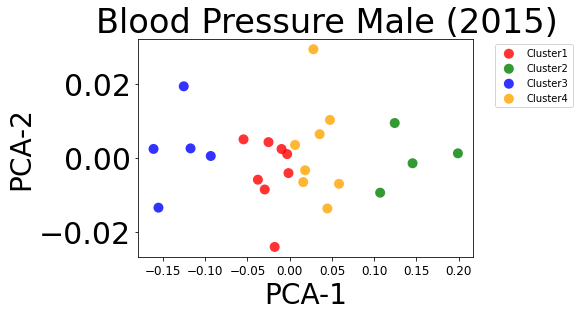

([[-0.15258669971286162], [-0.12692467996269913], [-0.07667287391837542], [-0.10088899944600939], [-0.09484075389371899], [-0.12031594614095496], [-0.14596771063593125], [-0.08446040250555473], [-0.08525504146642202]], [[0.005496634845978471], [0.016940081843925196], [-0.005564952874841475], [-0.0004904108706085492], [-0.0036327998175915968], [0.002797899786040732], [-0.005280931765804538], [0.002369504336121232], [0.0016539649592779528]])
([[0.09186184141108794], [0.11858742725793384], [0.10242041291990013], [0.05233061315217318], [0.1079311684958402], [0.09492909859848754]], [[0.027959885521828477], [0.0130228488282422], [0.0027353339391558], [-0.019237796799722644], [-0.0106563290659336], [-0.01365269004919296]])
([[-0.038636416822738044], [0.021307739155877522], [0.013991522145319159], [-0.04200324519661624], [-0.0433561075833418], [-0.02071304065413983], [-0.04160559881537065]], [[0.0007984329775541782], [-0.001599611827194173], [0.002572265986204129], [-0.007585758732266458], [-0

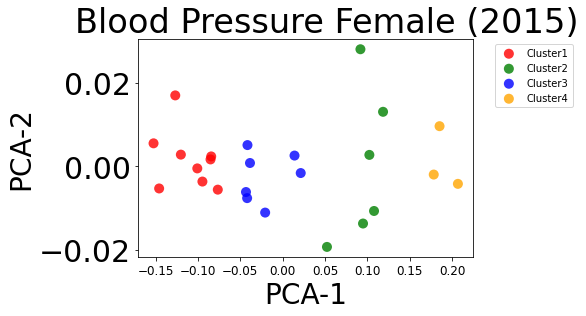

In [66]:
# Visulaize  Clusters 
title1 = '    Blood Pressure Male (2015)'
title2 = '    Blood Pressure Female (2015)'
xlabel = 'PCA-1'
ylabel = 'PCA-2'
plot_cluster(BP_frame1_male,title1,xlabel,ylabel)
plot_cluster(BP_frame1_female,title2,xlabel,ylabel)

<a class="anchor" id="ClusteLabelingBloodPressureCases"></a>
## Cluste Labeling :- Blood Pressure Male

* Cluster 0 ------> Severity 1 Lower Prevelance
* Cluster 1 ------> Severity 2 Medium Prevelance
* Cluster 2 ------> Severity 0 lowest Prevelance
* Cluster 3 ------> Severity 3 Highest Prevelance

## Cluste Labeling :- Blood Pressure Female
* Cluster 0 ------> Severity 0 Loweest Prevelance
* Cluster 1 ------> Severity 2 Medium Prevelance
* Cluster 2 ------> Severity 3 Highest Prevelance
* Cluster 3 ------> Severity 1 Lower Prevelance

In [67]:
data_BP_male = pd.DataFrame(np.array(BP_data_male),columns=['Raised_Blood_Pressure','Raised_Blood_Pressure_more_95','Raised_Blood_Pressure_less_95','cluster'])
_,labeled_clus_bp_male = auto_labeler(data_BP_male,[-1,-1,-1])

data_BP_Female = pd.DataFrame(np.array(BP_data_female),columns=['Raised_Blood_Pressure','Raised_Blood_Pressure_more_95','Raised_Blood_Pressure_less_95','cluster'])
_,labeled_clus_bp_female =auto_labeler(data_BP_Female,[-1,-1,-1])


Cluster Mean Values [[0.23241069272973627, 0.15518175674071139, 0.32022827303972073, 0.0], [0.32609206525559176, 0.2273959246235862, 0.437282247793909, 1.0], [0.17234568911749437, 0.11515115285281614, 0.2393661630986838, 2.0], [0.26411507041530247, 0.18237763706025223, 0.3552965873162688, 3.0]]
3
Final Cumlative Cluster Scores[-0.7078207225101685, -0.990770237673087, -0.5268630050689943, -0.8017892947918235]
Final Cumlative Cluster Scores sorted [-0.990770237673087, -0.8017892947918235, -0.7078207225101685, -0.5268630050689943]
Labeled Cluster:- [1, 3, 0, 2]

Cluster Auto Labeling 

Cluster 1 ------> Susceptibility Sever-1 


Cluster 3 ------> Susceptibility Sever-2 


Cluster 0 ------> Susceptibility Sever-3 


Cluster 2 ------> Susceptibility Sever-4 


Cluster Mean Values [[0.12930157049020477, 0.08589221937793635, 0.18256953581579688, 0.0], [0.24396399794424087, 0.1691459381243705, 0.329951670545569, 1.0], [0.17828306519557016, 0.11899610961032171, 0.24814769369776843, 2.0], [0.297

<ipython-input-67-dbc197c1ba60>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  data_BP_male = pd.DataFrame(np.array(BP_data_male),columns=['Raised_Blood_Pressure','Raised_Blood_Pressure_more_95','Raised_Blood_Pressure_less_95','cluster'])
<ipython-input-67-dbc197c1ba60>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  data_BP_Female = pd.DataFrame(np.array(BP_data_female),columns=['Raised_Blood_Pressure','Raised_Blood_Pressure_more_95','Raised_Blood_Pressure_less_95','cluster'])


## Diabetes

<a class="anchor" id="Diabetes"></a>

In [68]:
Diabetes_Male_Data = Diabetes_Countires_Wise[(Diabetes_Countires_Wise['Sex']=='Men') & 
                                             (Diabetes_Countires_Wise['Year']==2014)]
if Verbose:
    Diabetes_Male_Data

In [69]:
## Check the List of Countries avaialable

## Columns renaming for Uniformity
Diabetes_Male_Data = Diabetes_Countires_Wise[(Diabetes_Countires_Wise['Sex']=='Men') & 
                                             (Diabetes_Countires_Wise['Year']==2014)]

Diabetes_Female_Data =Diabetes_Countires_Wise[(Diabetes_Countires_Wise['Sex']=='Women') & 
                                             (Diabetes_Countires_Wise['Year']==2014)]
#------------------------------------------------------------
Diabetes_Countires_Wise_complete = Diabetes_Male_Data
# Diabetes Data 
Diabetes_Countires_Wise_complete = np.array(Diabetes_Countires_Wise_complete)
Diabetes_Countires_Wise_complete[:,[3,4,5]] = np.array(Diabetes_Countires_Wise_complete[:,[3,4,5]]).astype(float)
selected_countries = np.zeros(shape=(1,4)) 
data_diabetes = Diabetes_Countires_Wise_complete[:,[0,1,2,3,4,5]]

if Debug:
    print(data_diabetes)

filter2 = []
for i in countries:
    filter2.clear()
    for j in range(0,len(data_diabetes[:,0])):
            if(data_diabetes[j,0] == i):
                filter2.append(True)
            else:
                filter2.append(False)
    Diabetes_Countires_Wise_complete = data_diabetes[filter2]
    for j in range(0,len(Diabetes_Countires_Wise_complete[:,0])):
                if(Diabetes_Countires_Wise_complete[j,0] == i):
                    val1 = ((sum(Diabetes_Countires_Wise_complete[:,3]))/len(Diabetes_Countires_Wise_complete[:,[3]]))
                    val2 = ((sum(Diabetes_Countires_Wise_complete[:,4]))/len(Diabetes_Countires_Wise_complete[:,[4]]))
                    val3 = ((sum(Diabetes_Countires_Wise_complete[:,5]))/len(Diabetes_Countires_Wise_complete[:,[5]]))
                    selected_countries = np.append(selected_countries,[str(i),float(val1),float(val2),float(val3)])
                    selected_countries = selected_countries.reshape((int(len(selected_countries)/4)),4)
                    break;
selected_countries_male   = selected_countries[1:,[0,1,2,3]]

if Debug:
    print("-----------------------------------------MALE DATA-------------------------------------------------")
    print(selected_countries_male[:,[0,1,2,3]])

#-----------------------------------------------------------------------------------------------------------------------

Diabetes_Countires_Wise_complete = Diabetes_Female_Data
# Diabetes Data 
Diabetes_Countires_Wise_complete = np.array(Diabetes_Countires_Wise_complete)
Diabetes_Countires_Wise_complete[:,[3,4,5]] = np.array(Diabetes_Countires_Wise_complete[:,[3,4,5]]).astype(float)
selected_countries = np.zeros(shape=(1,4)) 
data_diabetes = Diabetes_Countires_Wise_complete[:,[0,1,2,3,4,5]]

if Debug:
    print(data_diabetes)

filter2 = []
for i in countries:
    filter2.clear()
    for j in range(0,len(data_diabetes[:,0])):
            if(data_diabetes[j,0] == i):
                filter2.append(True)
            else:
                filter2.append(False)
    Diabetes_Countires_Wise_complete = data_diabetes[filter2]
    for j in range(0,len(Diabetes_Countires_Wise_complete[:,0])):
                if(Diabetes_Countires_Wise_complete[j,0] == i):
                    val1 = ((sum(Diabetes_Countires_Wise_complete[:,3]))/len(Diabetes_Countires_Wise_complete[:,[3]]))
                    val2 = ((sum(Diabetes_Countires_Wise_complete[:,4]))/len(Diabetes_Countires_Wise_complete[:,[4]]))
                    val3 = ((sum(Diabetes_Countires_Wise_complete[:,5]))/len(Diabetes_Countires_Wise_complete[:,[5]]))
                    selected_countries = np.append(selected_countries,[str(i),float(val1),float(val2),float(val3)])
                    selected_countries = selected_countries.reshape((int(len(selected_countries)/4)),4)
                    break;
selected_countries_female   = selected_countries[1:,[0,1,2,3]]
if Debug:
    print("-----------------------------------------Female DATA-------------------------------------------------")
    print(selected_countries_female[:,[0,1,2,3]])


In [70]:
def cluster_diabetes(selected_countries):    
    clustering = KMeans(n_clusters=4, random_state=0).fit(selected_countries[:,[1,2,3]])
    clustering.labels_
    clus = list(clustering.labels_)
    DB_frame = list(zip(countries,clus))
    if Debug:
        print(DB_frame)
        print("-------------------------cluster data wise---------------------------------------")
    DB_frame1 = list(zip(selected_countries[:,[0]].tolist(),selected_countries[:,[1]].tolist(),selected_countries[:,[2]].tolist(),selected_countries[:,[3]].tolist(),clus))
    DB_frame2 = list(zip(selected_countries[:,[1]].tolist(),selected_countries[:,[2]].tolist(),selected_countries[:,[3]].tolist(),clus))
    if Debug:
        print(DB_frame1)
    return DB_frame2,DB_frame1,DB_frame,clus

Diabetes_data_male,Diabetes_frame1_male,Diabetes_frame_male , clus_male = cluster_diabetes(selected_countries_male)
Diabetes_data_female,Diabetes_frame1_female,Diabetes_frame_female,clus_female = cluster_diabetes(selected_countries_female)

In [71]:
## Dimensionality Reduction for clusters to plot Graphs in 2D

#### MALE#####
x = selected_countries_male[:,[1,2,3]]
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principleDf_Array = np.array(principalDf)
principleDf_Array[:,[0,1]].tolist()
Diabetes_frame1_male = list(zip(principleDf_Array[:,[0]].tolist(),principleDf_Array[:,[1]].tolist(),clus_male))
Diabetes_frame1_male

#### FEMALE#######
x = selected_countries_female[:,[1,2,3]]
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principleDf_Array = np.array(principalDf)
principleDf_Array[:,[0,1]].tolist()
Diabetes_frame1_female = list(zip(principleDf_Array[:,[0]].tolist(),principleDf_Array[:,[1]].tolist(),clus_female))

if Debug:
    Diabetes_frame1_female

## Diabetes Cluster Plot
<a class="anchor" id="DiabetesPlot"></a>

([[-0.04083279001318556], [-0.04273241913780128], [-0.05869074683013555], [-0.035224783244743284], [-0.04149928858837439], [-0.05180175509641013], [-0.06371959875361193]], [[0.011686296520718332], [0.002408435213542501], [0.0025541547764421557], [0.005740554315019228], [0.0015208835006232215], [0.005135858222810519], [0.0054349315876273604]])
([[0.05849098504852985], [0.028275858293739582], [0.03147909385821155], [0.032853605031864484], [0.02981722604538573], [0.02785220240703093], [0.0760646311722387]], [[-0.0043118542866343425], [-0.010098668942284218], [0.0003083737535720894], [-0.0042814844208105395], [-0.008535993183627723], [-0.00010597987798739865], [-0.004026686155172821]])
([[0.20066563620592262]], [[0.012323902883521075]])
([[-0.028089586677893994], [0.00996299348759518], [-0.0071021574657783885], [-0.007773754607127029], [-0.0231315910661034], [-0.010494781869871366], [-0.023631472992308136], [-0.01734450982666153], [-0.012452608128617076], [-0.030940387251895397]], [[0.0031

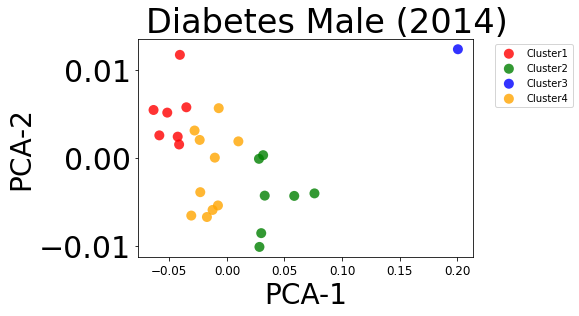

([[-0.05735090411417306], [-0.024974069266634053], [-0.05489568916595112], [-0.07138260910545807], [-0.03174532402776625], [-0.09225441067946033], [-0.04677789499121669], [-0.051713293685746196], [-0.05438652941915273], [-0.07010735472960031], [-0.07883879290642835]], [[0.002395684502076391], [0.004761580718982901], [0.00831852473862569], [0.0020494919312815853], [0.0019259875221708082], [0.003803443943998121], [0.0005303392716645703], [0.005176737330905278], [0.0013792347337460422], [0.0027437656112714393], [0.003942820357959589]])
([[0.010154594453667221], [0.03119217992992537], [0.02399270581303145], [0.004697834164022504], [0.03841851276764347], [0.0002681066441225592], [-0.006528707404264438], [-0.010183714768758735], [0.0028665506809568723]], [[0.0024345506120171134], [-0.0009797194001221528], [-0.0066641840531421965], [-0.00548733759823027], [-0.006068030820120891], [-0.00036990554895861925], [-0.008549944206805585], [-0.007525165624107919], [-0.006341477103666809]])
([[0.213640

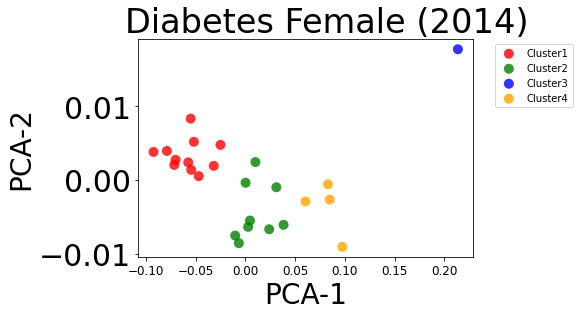

In [72]:
# Visulaize  Clusters 
title1 = '    Diabetes Male (2014)'
title2 = '    Diabetes Female (2014)'
xlabel = 'PCA-1'
ylabel = 'PCA-2'
plot_cluster(Diabetes_frame1_male,title1,xlabel,ylabel)
plot_cluster(Diabetes_frame1_female,title2,xlabel,ylabel)

## Cluste Labeling :- Diabetes Male
<a class="anchor" id="ClusteLabelingDiabetesCases"></a>
* Cluster 0 ------> Severity 1 Lower Prevelance
* Cluster 1 ------> Severity 2 Medium Prevelance
* Cluster 2 ------> Severity 3 Highest Prevelance
* Cluster 3 ------> Severity 0 Lowest Prevelance

## Cluste Labeling :- Diabetes Female
* Cluster 0 ------> Severity 1 Lower Prevelance
* Cluster 1 ------> Severity 2 Medium Prevelance
* Cluster 2 ------> Severity 3 Highest Prevelance
* Cluster 3 ------> Severity 0 Lowest Prevelance


In [73]:
data_diabetes_male = pd.DataFrame(np.array(Diabetes_data_male),columns=['Raised_diabetes','Raised_diabetes_more_95','Raised_diabetes_less_95','cluster'])
_,labeled_clus_diabetes_male = auto_labeler(data_diabetes_male,[-1,-1,-1])

data_diabetes_female= pd.DataFrame(np.array(Diabetes_data_female),columns=['Raised_diabetes','Raised_diabetes_more_95','Raised_diabetes_less_95','cluster'])
_,labeled_clus_diabetes_female = auto_labeler(data_diabetes_female,[-1,-1,-1])


Cluster Mean Values [[0.060256645234214985, 0.03350333662950432, 0.09603513842905655, 0.0], [0.10571566525817197, 0.05781055322489697, 0.16855026990977184, 1.0], [0.19659365448643495, 0.128437913333102, 0.280923396162734, 2.0], [0.07571675906989658, 0.040452853527444474, 0.12473213456015178, 3.0]]
3
Final Cumlative Cluster Scores[-0.18979512029277584, -0.33207648839284076, -0.605954963982271, -0.24090174715749285]
Final Cumlative Cluster Scores sorted [-0.605954963982271, -0.33207648839284076, -0.24090174715749285, -0.18979512029277584]
Labeled Cluster:- [2, 1, 3, 0]

Cluster Auto Labeling 

Cluster 2 ------> Susceptibility Sever-1 


Cluster 1 ------> Susceptibility Sever-2 


Cluster 3 ------> Susceptibility Sever-3 


Cluster 0 ------> Susceptibility Sever-4 


Cluster Mean Values [[0.04642026132387054, 0.025938427843676323, 0.0749202263927985, 0.0], [0.08049459898856363, 0.043064160396804024, 0.13201249211363023, 1.0], [0.196190961273289, 0.128861318022938, 0.2768971654608581, 2.0]

<ipython-input-73-69f66073e7d7>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  data_diabetes_male = pd.DataFrame(np.array(Diabetes_data_male),columns=['Raised_diabetes','Raised_diabetes_more_95','Raised_diabetes_less_95','cluster'])
<ipython-input-73-69f66073e7d7>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  data_diabetes_female= pd.DataFrame(np.array(Diabetes_data_female),columns=['Raised_diabetes','Raised_diabetes_more_95','Raised_diabetes_less_95','cluster'])


## Tuber Culosis

<a class="anchor" id="TuberCulosis"></a>

In [74]:
## Check the List of Countries avaialable

## Columns renaming for Uniformity

#------------------------------------------------------------
Tuber_Culosis_Countires_Wise_complete = Tuber_Culosis_Countires_Wise
# TB Data 
Tuber_Culosis_Countires_Wise_complete = np.array(Tuber_Culosis_Countires_Wise_complete)
Tuber_Culosis_Countires_Wise_complete[:,[1,2]] = np.array(Tuber_Culosis_Countires_Wise_complete[:,[1,2]]).astype(int)
selected_countries = np.zeros(shape=(1,3)) 
data_tb = Tuber_Culosis_Countires_Wise_complete[:,[0,1,2]]
filter2 = []
for i in countries:
    filter2.clear()
    for j in range(0,len(data_tb[:,0])):
            if(data_tb[j,0] == i):
                filter2.append(True)
            else:
                filter2.append(False)
    Tuber_Culosis_Countires_Wise_complete = data_tb[filter2]
    for j in range(0,len(Tuber_Culosis_Countires_Wise_complete[:,0])):
                if(Tuber_Culosis_Countires_Wise_complete[j,0] == i):
                    val1 = ((sum(Tuber_Culosis_Countires_Wise_complete[:,1]))/len(Tuber_Culosis_Countires_Wise_complete[:,[1]]))
                    val2 = ((sum(Tuber_Culosis_Countires_Wise_complete[:,2]))/len(Tuber_Culosis_Countires_Wise_complete[:,[2]]))
                    selected_countries = np.append(selected_countries,[str(i),int(val1),int(val2)])
                    selected_countries = selected_countries.reshape((int(len(selected_countries)/3)),3)
                    break;
selected_countries   = selected_countries[1:,[0,1,2]]


if Verbose:
    print(selected_countries[:,[0,1,2]])

In [75]:
clustering = KMeans(n_clusters=5, random_state=0).fit(selected_countries[:,[1,2]])
clustering.labels_
clus = list(clustering.labels_)
TB_frame = list(zip(countries,clus))
TB_frame1 = list(zip(selected_countries[:,[1]].tolist(),selected_countries[:,[2]].tolist(),clus))

if Debug:
    print(TB_frame)
    print("-------------------------cluster data wise---------------------------------------")
    print(TB_frame1)

In [76]:
## Dimensionality Reduction for clusters to plot Graphs in 2D

x = selected_countries[:,[1,2]]
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principleDf_Array = np.array(principalDf)
principleDf_Array[:,[0,1]].tolist()
TB_frame1 = list(zip(principleDf_Array[:,[0]].tolist(),principleDf_Array[:,[1]].tolist(),clus))

if Debug:
    TB_frame1



## Tuber Culosis Cluster Plot
<a class="anchor" id="TuberCulosisClusterPlot"></a>

([[-77585.76930954668], [-96725.46792990708], [-100044.38573587385], [-81850.52350323691], [-93665.96535621848], [-92782.54058424447], [-96480.75207698133], [-100383.6782656581], [-100342.26849351585], [-99923.80121892845], [-100163.19308677469], [-88393.39350528455], [-99545.74405087253], [-98650.71804674168], [-100217.21961452783], [-100272.0994221806], [-71400.24506353567], [-100099.95023673448], [-99420.78363762496]], [[-2311.3983579361397], [-2584.229297822131], [-2313.8913662682003], [213.49840577479557], [-2745.7842469657803], [-2329.056911334104], [-2644.587821054692], [-2350.0794752627935], [-2357.375417362814], [-2388.2645756452707], [-2390.616938093529], [-2731.255766699608], [-2339.2974674853576], [-1825.7485876992805], [-2393.800379460825], [-2359.8856818800173], [-2952.967373720547], [-2355.6835454900397], [-2435.161408156465]])
([[1194996.8998580782]], [[-13569.935838731675]])
([[455342.5421019036]], [[23037.205176399773]])
([[8284.230818331314], [-19500.523039804943]], 

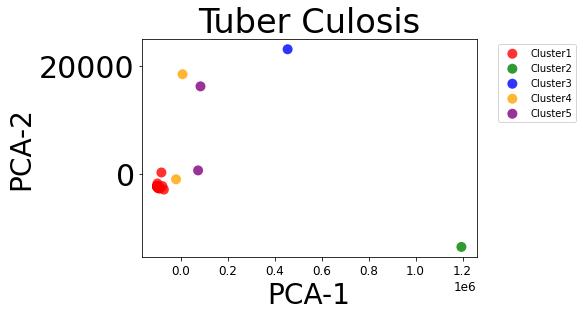

In [77]:
# Visulaize  Clusters 
title = 'Tuber Culosis'
xlabel = 'PCA-1'
ylabel = 'PCA-2'
plot_cluster(TB_frame1,title,xlabel,ylabel)

## Medical Expending
<a class="anchor" id="MedicalExpending"></a>

In [78]:
## Check the List of Countries avaialable

## Columns renaming for Uniformity

#------------------------------------------------------------
Medical_Expending_Countires_Wise_complete = Medical_Expending_Countires_Wise
# Medical Expending
Medical_Expending_Countires_Wise_complete = np.array(Medical_Expending_Countires_Wise_complete)
Medical_Expending_Countires_Wise_complete[:,[1,2,3]] = np.array(Medical_Expending_Countires_Wise_complete[:,[1,2,3]]).astype(int)
selected_countries = np.zeros(shape=(1,4)) 
data_ME = Medical_Expending_Countires_Wise_complete[:,[0,1,2,3]]
filter2 = []
for i in countries:
    filter2.clear()
    for j in range(0,len(data_ME[:,0])):
            if(data_ME[j,0] == i):
                filter2.append(True)
            else:
                filter2.append(False)
    Medical_Expending_Countires_Wise_complete = data_ME[filter2]
    for j in range(0,len(Medical_Expending_Countires_Wise_complete[:,0])):
                if(Medical_Expending_Countires_Wise_complete[j,0] == i):
                    val1 = ((sum(Medical_Expending_Countires_Wise_complete[:,1]))/len(Medical_Expending_Countires_Wise_complete[:,[1]]))
                    val2 = ((sum(Medical_Expending_Countires_Wise_complete[:,2]))/len(Medical_Expending_Countires_Wise_complete[:,[2]]))
                    val3 = ((sum(Medical_Expending_Countires_Wise_complete[:,3]))/len(Medical_Expending_Countires_Wise_complete[:,[3]]))
                    selected_countries = np.append(selected_countries,[str(i),int(val1),int(val2),int(val3)])
                    selected_countries = selected_countries.reshape((int(len(selected_countries)/4)),4)
                    break;
selected_countries   = selected_countries[1:,[0,1,2,3]]


if Verbose:
    print(selected_countries[:,[0,1,2,3]])

In [79]:
if Debug:
    countries

In [80]:
clustering = KMeans(n_clusters=6, random_state=0).fit(selected_countries[:,[1,2,3]])
clustering.labels_
clus = list(clustering.labels_)
medical_expend_frame = list(zip(countries,clus))
medical_expend_frame1 = list(zip(selected_countries[:,[1]].tolist(),selected_countries[:,[2]].tolist(),selected_countries[:,[3]].tolist(),clus))
medical_expend_frame1_data = medical_expend_frame1
if Debug:
    print(medical_expend_frame)
    print("-------------------------cluster data wise---------------------------------------")
    print(medical_expend_frame1)

In [81]:
## Dimensionality Reduction for clusters to plot Graphs in 2D

x = selected_countries[:,[1,2,3]]
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principleDf_Array = np.array(principalDf)
principleDf_Array[:,[0,1]].tolist()
medical_expend_frame1 = list(zip(principleDf_Array[:,[0]].tolist(),principleDf_Array[:,[1]].tolist(),clus))
if Debug:
    medical_expend_frame1


## Medical Expending Cluster Plot
<a class="anchor" id="MedicalExpendingClusterPlot"></a>

([[-134.3656899080172], [2078.301492993444], [1588.4956058045263]], [[13.428044814654182], [478.99305428638075], [-116.64176887438867]])
([[-2737.728573551704], [-3473.60817570115], [-2772.8910531139472], [-2846.1444646699806], [-1724.6209486143407]], [[-179.46690518382], [-55.00753259804227], [-105.5661205411907], [64.0765495706861], [-23.28160850990648]])
([[12249.543772987685], [12169.763302183977]], [[-192.54648567985006], [205.46927033844932]])
([[3319.8543731406326], [3871.613751484417], [3057.2971157416114], [5033.97503397975], [3361.6624619743716]], [[-125.78266719335508], [-136.9433101257946], [12.149100941968099], [-5.301960203516891], [-2.7612332518271976]])
([[8362.09476337217]], [[-3.928189493964404]])
([[-4809.457438873039], [-4809.98625657374], [-4111.209746809813], [-4860.283299254286], [-4650.69724070804], [-4207.439432375113], [-4363.067574286321], [-4743.540692747153], [-4847.561086475939]], [[22.535466180282025], [19.752765880243818], [21.241268699724653], [23.00687

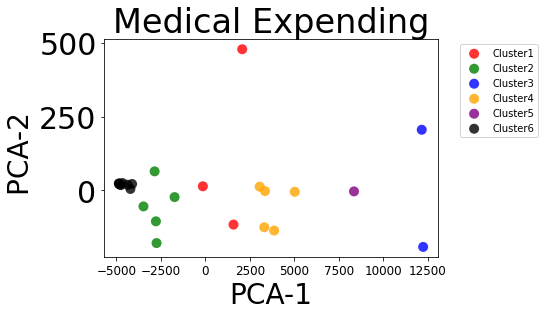

In [82]:
# Visulaize  Clusters 
title = 'Medical Expending'
xlabel = 'PCA-1'
ylabel = 'PCA-2 '
plot_cluster(medical_expend_frame1,title,xlabel,ylabel)

In [83]:
if Verbose:
    list(zip(selected_countries[:,[0]].tolist(),selected_countries[:,[2]].tolist(),selected_countries[:,[3]].tolist(),clus))

## Cluste Labeling :- Medical Expenditure
<a class="anchor" id="ClusteLabelingMedicalExpending"></a>
* Cluster 0 ------> Severity 0 Highest expending country 
* Cluster 1 ------> Severity 4 Lower  expending country
* Cluster 2 ------> Severity 2 High epending country  
* Cluster 3 ------> Severity 5 Lowest expending country
* Cluster 4 ------> Severity 1 upper medium expending country
* Cluster 5 ------> Severity 3 second Highest expending country 


In [84]:
data_Medical_expenditure = pd.DataFrame(np.array(medical_expend_frame1_data),columns=['2015_expenditure','2016_expenditure','2017_expenditure','cluster'])
_,labeled_clus_pop = auto_labeler(data_Medical_expenditure,[+1,+1,+1])

Cluster Mean Values [[3538.6666666666665, 3475.3333333333335, 3545.0, 0.0], [1232.8, 1170.0, 1416.4, 1.0], [9672.5, 9888.0, 10101.0, 2.0], [4857.6, 4939.6, 5175.2, 3.0], [7565.0, 7496.0, 7936.0, 4.0], [177.66666666666666, 177.66666666666666, 194.66666666666666, 5.0]]
3
Final Cumlative Cluster Scores[10559.0, 3819.2000000000003, 29661.5, 14972.400000000001, 22997.0, 550.0]
Final Cumlative Cluster Scores sorted [550.0, 3819.2000000000003, 10559.0, 14972.400000000001, 22997.0, 29661.5]
Labeled Cluster:- [5, 1, 0, 3, 4, 2]

Cluster Auto Labeling 

Cluster 5 ------> Susceptibility Sever-1 


Cluster 1 ------> Susceptibility Sever-2 


Cluster 0 ------> Susceptibility Sever-3 


Cluster 3 ------> Susceptibility Sever-4 


Cluster 4 ------> Susceptibility Sever-5 


Cluster 2 ------> Susceptibility Seve-6 




<ipython-input-84-88e81990e197>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  data_Medical_expenditure = pd.DataFrame(np.array(medical_expend_frame1_data),columns=['2015_expenditure','2016_expenditure','2017_expenditure','cluster'])


## Listing all the Clusters of Comorbidites

<a class="anchor" id="ListingalltheClustersofComorbidites"></a>

In [85]:

if Verbose:
    print("Covid-->\n")
    print(covid_frame)
    print("\nHIV-->\n")
    print(hiv_frame)
    print("\nDiabetes Male-->\n")
    print(Diabetes_frame_male)
    print("\nDiabetes Female-->\n")
    print(Diabetes_frame_female)
    print("\nBP Male-->\n")
    print(BP_frame_male)
    print("\nBP Female-->\n")
    print(BP_frame_female)
    print("\nTB-->\n")
    print(TB_frame)
    print("\nMedical-->\n")
    print(medical_expend_frame)
    print("\Age Group-->\n")
    print(age_frame)
    print("\Covid_Daily-->\n")
    print(covid_frame_daily)

# Main Cluster for Prediction

<a class="anchor" id="MainClusterforPrediction"></a>

## Main Mega Frame Formation
<a class="anchor" id="MainMegaFrameFormation"></a>

In [86]:
#final_frame = np.concatenate([covid_frame,hiv_frame,Diabetes_frame_male,Diabetes_frame_female,BP_frame_male,BP_frame_female,TB_frame,medical_expend_frame], axis=1)
# Excluded TB Data for now
final_frame = np.concatenate([manual_covid_frame,hiv_frame,Diabetes_frame_male,Diabetes_frame_female,BP_frame_male,BP_frame_female,medical_expend_frame,age_frame,covid_frame_daily], axis=1)
final_frame = final_frame[:,[0,1,3,5,7,9,11,13,15,17]]

if Debug:
    #TB_frame
    #covid_frame
    age_frame

In [87]:
final_frame

array([['Afghanistan', '0', '0', '1', '3', '1', '3', '5', '0', '0'],
       ['Italy', '1', '0', '3', '0', '3', '2', '0', '0', '1'],
       ['Kuwait', '3', '0', '2', '2', '3', '2', '1', '0', '1'],
       ['India', '0', '0', '3', '1', '3', '1', '5', '1', '0'],
       ['South Africa', '0', '1', '1', '3', '3', '1', '5', '0', '0'],
       ['US', '2', '0', '3', '0', '2', '0', '2', '2', '2'],
       ['Bangladesh', '1', '0', '1', '1', '0', '1', '5', '2', '0'],
       ['Brazil', '0', '0', '3', '1', '3', '2', '1', '2', '1'],
       ['United Kingdom', '2', '0', '0', '0', '2', '0', '0', '0', '2'],
       ['Sri Lanka', '3', '0', '3', '1', '0', '1', '5', '0', '0'],
       ['Chile', '0', '0', '1', '3', '3', '2', '1', '0', '1'],
       ['Norway', '2', '0', '0', '0', '0', '0', '4', '0', '0'],
       ['New Zealand', '0', '0', '3', '0', '2', '0', '0', '0', '0'],
       ['Switzerland', '2', '0', '0', '0', '0', '0', '2', '0', '1'],
       ['Ireland', '2', '0', '3', '0', '0', '2', '3', '0', '2'],
       ['A

## Ensuring Clusters Uniformity
<a class="anchor" id="EnsuringClustersUniformity"></a>

In [88]:
if Verbose:
    print(final_frame)

In [89]:
covid_frame_clus_weight = auto_weight_gen(labeled_clus_covid)#[0/5,5/5,1/5,4/5,3/5,2/5]
hiv_frame_clus_weight = auto_weight_gen(labeled_clus_hiv)#[0,1]
BP_frame__male_clus_weight = auto_weight_gen(labeled_clus_bp_male)#[1/3,2/3,0/3,3/3]
BP_frame__female_clus_weight = auto_weight_gen(labeled_clus_bp_female)#[0/3,2/3,3/3,1/3]
Diabetes_frame_male_clus_weight = auto_weight_gen(labeled_clus_diabetes_male)#[1/3,2/3,3/3,0/3]
Diabetes_frame_female_clus_weight = auto_weight_gen(labeled_clus_diabetes_female)#[1/3,2/3,3/3,0/3]
medical_expend_frame_clus_weight = auto_weight_gen(labeled_clus_pop)#[0/5,4/5,2/5,5/5,1/5,3/5]
age_frame_clus_weight = auto_weight_gen(labeled_clus_pop) #[0/3,2/3,1/3,3/3]
covid_frame_clus_weight_daily = auto_weight_gen(labeled_clus_covid_daily)#[1/3,2/3,0/3,3/3]
## Applying weights for the cluster values
for i in range(len(final_frame[:,0])):
    final_frame[:,1][i] = covid_frame_clus_weight[int(final_frame[:,1][i])]
    final_frame[:,2][i] = hiv_frame_clus_weight[int(final_frame[:,2][i])]
    final_frame[:,3][i] = BP_frame__male_clus_weight[int(final_frame[:,3][i])]
    final_frame[:,4][i] = BP_frame__female_clus_weight[int(final_frame[:,4][i])]
    final_frame[:,5][i] = Diabetes_frame_male_clus_weight[int(final_frame[:,5][i])]
    final_frame[:,6][i] = Diabetes_frame_female_clus_weight[int(final_frame[:,6][i])]
    final_frame[:,7][i] = medical_expend_frame_clus_weight[int(final_frame[:,7][i])]
    final_frame[:,8][i] = age_frame_clus_weight[int(final_frame[:,8][i])]
    final_frame[:,9][i] = covid_frame_clus_weight_daily[int(final_frame[:,9][i])]

[0.6, 0.8, 0.2, 1.0, 0.4, 0.0]
[1.0, 0.0]
[0.6666666666666666, 0.0, 1.0, 0.3333333333333333]
[1.0, 0.3333333333333333, 0.6666666666666666, 0.0]
[1.0, 0.3333333333333333, 0.0, 0.6666666666666666]
[1.0, 0.6666666666666666, 0.0, 0.3333333333333333]
[0.4, 0.2, 1.0, 0.6, 0.8, 0.0]
[0.4, 0.2, 1.0, 0.6, 0.8, 0.0]
[1.0, 0.6666666666666666, 0.0, 0.3333333333333333]


In [90]:
if Verbose:
    print(final_frame)

In [91]:
clustering = KMeans(n_clusters=5, random_state=0).fit(final_frame[:,[1,2,3,4,5,6,7,8,9]])
clustering.labels_
clus = list(clustering.labels_)
final_Clus_frame = list(zip(countries,clus))

final_Clus_frame1 = list(zip(final_frame[:,[0]].tolist(),final_frame[:,[1]].tolist(),final_frame[:,[2]].tolist(),clus))

final_Clus_frame1_data = list(zip(final_frame[:,[1]].tolist(),final_frame[:,[2]].tolist(),final_frame[:,[3]].tolist(),
                                  final_frame[:,[4]].tolist(),final_frame[:,[5]].tolist(),final_frame[:,[6]].tolist(),
                                  final_frame[:,[7]].tolist(),final_frame[:,[8]].tolist(),final_frame[:,[9]].tolist(),clus))

if Debug:
    print(final_Clus_frame)
    print(final_Clus_frame1)

In [92]:
## Dimensionality Reduction for clusters to plot Graphs in 2D

x = final_frame[:,[1,2,3,4,5,6,7,8,9]]
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principleDf_Array = np.array(principalDf)
principleDf_Array[:,[0,1]].tolist()
final_Clus_frame1 = list(zip(principleDf_Array[:,[0]].tolist(),principleDf_Array[:,[1]].tolist(),clus))
if Debug:
    final_Clus_frame1

## Main Cluster Plot
<a class="anchor" id="MainClusterPlot"></a>

([[0.38724723430113317], [0.5290155455142936], [0.5809367092684914]], [[-0.7511625617222355], [-0.7765361222883199], [-0.7385545365956023]])
([[-0.04812719439016254], [-0.15807271664876835], [-0.48138090488391605], [-0.7387440944422988], [-0.5557945648293252], [-0.8092888423096134]], [[0.33223797332423005], [0.2507892446448631], [0.3270806577349253], [0.3019188581845591], [0.320483083419809], [0.3686353123389292]])
([[0.6682083766871062], [0.8764204957968111], [0.40189085780577727], [0.9429063622479775], [0.9429063622479775]], [[0.024838330212881104], [0.2038258494976493], [1.0110259038885896], [0.4949755973942095], [0.4949755973942095]])
([[1.0839346970586643], [0.9594770223377578]], [[-0.12754096062589046], [-0.19245409802883914]])
([[-0.7673342550691195], [-0.35733097960918475], [-0.7252327401852896], [-0.5925304058391878], [-0.5064554654881636], [-0.05622448776874975], [-0.2125154431242206], [-0.5647860915289651], [-0.7991254771490255]], [[-0.27129378833604406], [-0.207469363327275

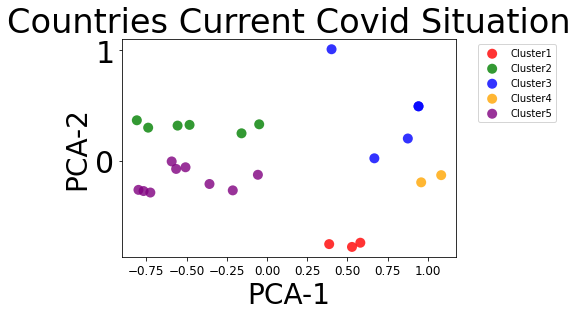

In [93]:
# Visulaize  Clusters 
title = 'Countries Current Covid Situation'
xlabel = 'PCA-1'
ylabel = 'PCA-2'
plot_cluster(final_Clus_frame1,title,xlabel,ylabel)

## Master Cluster Ordering
<a class="anchor" id="ClusteLabelingMainCluster"></a>
* Cluster 0 ------> Severity 0
* Cluster 1 ------> Severity 2 
* Cluster 2 ------> Severity 1 
* Cluster 3 ------> Severity 3
* Cluster 4 ------> Severity 4

In [94]:
# Auto Labeling
data_main_clus = pd.DataFrame(np.array(final_Clus_frame1_data),columns=['covid_frame','hiv_frame','Diabetes_frame_male','Diabetes_frame_female',
                                                            'BP_frame_male','BP_frame_female','medical_expend_frame','age_frame','covid_frame_daily','cluster'])
_,labeled_clus_main_frame = auto_labeler(data_main_clus,[-1,-1,-1,-1,-1,-1,1,-1,-1])

Cluster Mean Values [[0.6666666666666666, 1.0, 0.5555555555555, 1.0, 0.0, 1.0, 0.5333333333333333, 0.4000000000000001, 1.0, 0.0], [0.7000000000000001, 1.0, 0.27777777777776663, 0.44444444444441666, 0.7222222222221667, 0.0, 0.19999999999999998, 0.5333333333333333, 0.7222222222221667, 1.0], [0.2, 1.0, 0.5999999999999399, 1.0, 1.0, 0.8, 0.72, 0.4, 0.33333333333332, 2.0], [0.2, 1.0, 0.49999999999995004, 1.0, 0.0, 1.0, 0.7, 0.7, 0.0, 3.0], [0.7111111111111109, 0.8888888888888888, 0.18518518518516666, 0.2222222222222, 0.5925925925925557, 0.5555555555555, 0.022222222222222223, 0.5111111111111111, 0.8888888888888778, 4.0]]
9
Final Cumlative Cluster Scores[-5.0888888888888335, -4.19999999999985, -4.6133333333332605, -3.6999999999999504, -4.533333333333188]
Final Cumlative Cluster Scores sorted [-5.0888888888888335, -4.6133333333332605, -4.533333333333188, -4.19999999999985, -3.6999999999999504]
Labeled Cluster:- [0, 2, 4, 1, 3]

Cluster Auto Labeling 

Cluster 0 ------> Susceptibility Sever-1 


<ipython-input-94-1805846c1928>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  data_main_clus = pd.DataFrame(np.array(final_Clus_frame1_data),columns=['covid_frame','hiv_frame','Diabetes_frame_male','Diabetes_frame_female',


# Preparing Data for Deep Net Model
<a class="anchor" id="PreparingDataforDeepNetModel"></a>

In [95]:
## Creating Activation Function (Sigmoid Manually To change activation function make updates here !!)

def activation_function(z):
    return 1/(1+torch.exp(-z))
    

In [96]:

labels = pd.DataFrame(final_Clus_frame)
labels = labels[1]
Country_order = labels[0]
labels = pd.DataFrame(labels)
labels = labels.rename(columns={1: "Target"})

In [97]:
data_label = pd.DataFrame(final_frame[:,[0]])
data = pd.DataFrame(final_frame[:,[1,2,3,4,5,6,7,8,9]])
Data_Label_Combined = pd.concat([data, labels], axis=1)
## Storing data into a Dataset Deep_Net_Data
Data_Label_Combined.to_csv('../DeepNet_Training_Data/Deep_Net_Data.csv')
#data
if Debug:
    Data_Label_Combined

In [98]:
Data_Label_Combined = transformDataframeto_float(Data_Label_Combined)
if Debug:
    Data_Label_Combined

<ipython-input-10-216657a0515e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[k][i] = float(data[k][i])


In [99]:
Data_Label_Combined_np_array = np.array(Data_Label_Combined)

if Debug:
    Data_Label_Combined_np_array

In [100]:
## Converting values to float to convert to tensor
Data_Label_Combined = Data_Label_Combined.astype(float)
Data_Label_Combined['Target'] = Data_Label_Combined['Target'].astype(int)

Data_Label_Combined

,0,1,2,3,4,5,6,7,8,Target
0,0.6,1.0,0.000000,0.000000,0.333333,0.333333,0.0,0.4,1.000000,4
1,0.8,1.0,0.333333,1.000000,0.666667,0.000000,0.4,0.4,0.666667,1
2,1.0,1.0,1.000000,0.666667,0.666667,0.000000,0.2,0.4,0.666667,1
3,0.6,1.0,0.333333,0.333333,0.666667,0.666667,0.0,0.2,1.000000,4
4,0.6,0.0,0.000000,0.000000,0.666667,0.666667,0.0,0.4,1.000000,4
5,0.2,1.0,0.333333,1.000000,0.000000,1.000000,1.0,1.0,0.000000,3
6,0.8,1.0,0.000000,0.333333,1.000000,0.666667,0.0,1.0,1.000000,4
7,0.6,1.0,0.333333,0.333333,0.666667,0.000000,0.2,1.0,0.666667,1
8,0.2,1.0,0.666667,1.000000,0.000000,1.000000,0.4,0.4,0.000000,3
9,1.0,1.0,0.333333,0.333333,1.000000,0.666667,0.0,0.4,1.000000,4


In [101]:

torch_tensor_output = torch.tensor(Data_Label_Combined['Target'].values)
torch_tensor_input_data = torch.tensor(Data_Label_Combined[[0,1,2,3,4,5,6,7,8]].values)
torch_tensor_fullData_data = torch.tensor(Data_Label_Combined[[0,1,2,3,4,5,6,7,8,'Target']].values)

#torch_tensor = torch.from_numpy(Data_Label_Combined_np_array)
if Verbose:
    print(torch_tensor_output)
    print(torch_tensor_input_data)

In [102]:
#torch.reshape(torch_tensor_fullData_data[0],(5,2))

In [103]:
class Dataset(object):   

    def __getitem__(self, index):
        raise NotImplementedError

    def __len__(self):
        raise NotImplementedError

    def __add__(self, other):
        return ConcatDataset([self, other])



class dataset(Dataset):
    
    def __init__(self, Data_Frame, transform=None):
        self.data = Data_Frame
        self.transform = transform
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        
        out_data = self.data.iloc[index,[0,1,2,3,4,5,6,7,8]]
        label = self.data.iloc[index, 9]
        
        if self.transform is not None:
            out_data = self.transform(out_data)
         
        return torch.tensor(out_data.values).float() , torch.tensor(label).float()

In [104]:
Processed_data = dataset(Data_Label_Combined)

In [105]:
## Loading Data into Data Loader
# create the dataset
dataset = CSVDataset('../DeepNet_Training_Data/Deep_Net_Data.csv')

train_loader = torch.utils.data.DataLoader(Processed_data,batch_size = 1 ,shuffle=False)
# # select rows from the dataset
#train, test = random_split(train_loader, [[...], [...]])
# # create a data loader for train and test sets
# train_dl = DataLoader(train, batch_size=32, shuffle=True)
# test_dl = DataLoader(test, batch_size=1024, shuffle=False)

## Deep Net Model

<a class="anchor" id="DeepNetModel"></a>

In [106]:
## Deep Net Model Schema

model = nn.Sequential(nn.Linear(9,64),
                     nn.ReLU(),
                     nn.Linear(64,1))   ## We need to improve this 

## Loss definition

#criterion = nn.CrossEntropyLoss()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

## Training

epochs = 80
for e in range(epochs):
    running_loss = 0
    for dat,lab in train_loader:
        
    
        # TODO: Training pass
        optimizer.zero_grad()
        
        output = model(dat)
        loss = criterion(output, lab)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        if(e%10==0):
            print(f"Training loss: {running_loss/len(dat)}")
        
if Verbose:
    ## Prediction 
    with torch.no_grad():
        predictions = model(dat)
    print(predictions)
    print(round(predictions.tolist()[0][0]))

c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Training loss: 118.3160909738217
Training loss: 45.00088730454445
Training loss: 33.56430296599865
Training loss: 26.25900769745931
Training loss: 22.004881207511062
Training loss: 18.709204856771976
Training loss: 16.50677226480184
Training loss: 14.855659857275896


In [107]:
## Preditions for Country Clusters
final_clus_predictions = []
for dat,lab in train_loader:
    with torch.no_grad():
        predictions = model(dat)
        final_clus_predictions.append(round(predictions.tolist()[0][0]))
final_clus_predictions

[3, 0, 1, 4, 4, 2, 4, 2, 2, 4, 2, 1, 1, 1, 1, 2, 1, 1, 2, 4, 4, 3, 3, 3, 3]

In [108]:
data_label
Deep_Net_Clustering = pd.concat([data_label, pd.DataFrame(final_clus_predictions,columns = ['Clusters'])], axis=1)

Deep_Net_Clustering = Deep_Net_Clustering.rename(columns={0:"Countries"})

Deep_Net_Clustering

,Countries,Clusters
0,Afghanistan,3
1,Italy,0
2,Kuwait,1
3,India,4
4,South Africa,4
5,US,2
6,Bangladesh,4
7,Brazil,2
8,United Kingdom,2
9,Sri Lanka,4


# Vaccine Dosage Prediction
<a class="anchor" id="VaccineDosagePrediction"></a>

## For Now 

### Severity 0 = 10%
### Severity 1 = 20%
### Severity 2 = 30%
### Severity 3 = 40%
### Severity 4 = 70%

# Minimum  Vaccine Dosage Requirment Calcualtion

In [109]:
final_Clus_frame = np.array(final_Clus_frame)

In [110]:
if Verbose:
    print("Labeld Main Frame Clusters " + str(labeled_clus_main_frame))

In [111]:
Master_frame_clus_weight = auto_cluster_label(labeled_clus_main_frame)#[0,2,1,3,4]
# Master_frame_clus_weight = [0,2,1,3,4]



## Applying weights for the cluster values
for i in range(len(final_Clus_frame[:,0])):
    final_Clus_frame[:,1][i] = Master_frame_clus_weight[int(final_Clus_frame[:,1][i])]
    

[0, 3, 1, 4, 2]


In [112]:
final_Clus_frame = pd.DataFrame(final_Clus_frame)
lis1 = list(final_Clus_frame[0])
lis2 = list(final_Clus_frame[1])
final_Clus_frame = list(zip(lis1,lis2))

if Verbose:
    print(pd.DataFrame(final_Clus_frame))

In [113]:
Population_Data_Countires_Wise_Descreet = Population_Data_Countires_Wise_Descreet.fillna(0)

if Verbose:
    print(Population_Data_Countires_Wise_Descreet)

In [114]:
if Debug:
    print(set(Population_Data_Countires_Wise_Descreet['Country']))

In [115]:
Population_Data_Countires_Wise_complete = Population_Data_Countires_Wise_Descreet
# Covid Data 
Population_Data_Countires_Wise_complete = np.array(Population_Data_Countires_Wise_complete)
if Debug:
    Population_Data_Countires_Wise_complete[:,[6,7,8]]

In [116]:
Population_Data_Countires_Wise_complete = Population_Data_Countires_Wise_Descreet
# Covid Data 
Population_Data_Countires_Wise_complete = np.array(Population_Data_Countires_Wise_complete)
Population_Data_Countires_Wise_complete[:,[6,7,8]] = np.array(Population_Data_Countires_Wise_complete[:,[6,7,8]]).astype(int)
selected_countries = np.zeros(shape=(1,4)) 
data_pop = Population_Data_Countires_Wise_complete
filter3 = []
for i in countries:
    filter3.clear()
    for j in range(0,len(data_pop[:,0])):
            if(data_pop[j,1] == i):
                filter3.append(True)
            else:
                filter3.append(False)
    Population_Data_Countires_Wise_complete = data_pop[filter3]
    for j in range(0,len(Population_Data_Countires_Wise_complete[:,0])):
                if(Population_Data_Countires_Wise_complete[j,1] == i):
                    val1 = ((sum(Population_Data_Countires_Wise_complete[:,6]))/len(Population_Data_Countires_Wise_complete[:,[6]]))
                    val2 = ((sum(Population_Data_Countires_Wise_complete[:,7]))/len(Population_Data_Countires_Wise_complete[:,[7]]))
                    val3 = ((sum(Population_Data_Countires_Wise_complete[:,8]))/len(Population_Data_Countires_Wise_complete[:,[8]]))
                    selected_countries = np.append(selected_countries,[str(i),int(val1),int(val2),int(val3)])
                    selected_countries = selected_countries.reshape((int(len(selected_countries)/4)),4)
                    break;
selected_countries   = selected_countries[1:,[0,1,2,3]]


if Verbose:
    print(selected_countries)

In [117]:
final_Clus_frame = np.concatenate([final_Clus_frame,selected_countries], axis=1)

In [118]:
if Debug:
    print(selected_countries)

In [119]:
final_Clus_frame = final_Clus_frame[:,[0,1,3,4,5]]
if Debug:
    print(final_Clus_frame)

In [120]:
final_Clus_frame

array([['Afghanistan', '2', '19976', '18952', '38928'],
       ['Italy', '3', '29437', '31024', '60461'],
       ['Kuwait', '3', '2614', '1656', '4270'],
       ['India', '2', '717100', '662903', '1380004'],
       ['South Africa', '2', '29216', '30092', '59308'],
       ['US', '4', '163786', '167216', '331002'],
       ['Bangladesh', '2', '83259', '81430', '164689'],
       ['Brazil', '3', '104435', '108123', '212559'],
       ['United Kingdom', '4', '33542', '34343', '67886'],
       ['Sri Lanka', '2', '10267', '11145', '21413'],
       ['Chile', '3', '9425', '9690', '19116'],
       ['Norway', '1', '2739', '2681', '5421'],
       ['New Zealand', '0', '2370', '2452', '4822'],
       ['Switzerland', '1', '4293', '4360', '8654'],
       ['Ireland', '1', '2451', '2486', '4937'],
       ['Argentina', '3', '22049', '23146', '45195'],
       ['Australia', '0', '12698', '12801', '25499'],
       ['Canada', '0', '18732', '19009', '37742'],
       ['China', '3', '738247', '701076', '1439323']

In [121]:
Array_Deep_Net_Clustering = np.array(Deep_Net_Clustering)

## Adding population data for Deep Net Predictions
Array_Deep_Net_Clustering = np.concatenate((Array_Deep_Net_Clustering, final_Clus_frame[:,[2,3,4]]), axis=1)
Array_Deep_Net_Clustering

array([['Afghanistan', 3, '19976', '18952', '38928'],
       ['Italy', 0, '29437', '31024', '60461'],
       ['Kuwait', 1, '2614', '1656', '4270'],
       ['India', 4, '717100', '662903', '1380004'],
       ['South Africa', 4, '29216', '30092', '59308'],
       ['US', 2, '163786', '167216', '331002'],
       ['Bangladesh', 4, '83259', '81430', '164689'],
       ['Brazil', 2, '104435', '108123', '212559'],
       ['United Kingdom', 2, '33542', '34343', '67886'],
       ['Sri Lanka', 4, '10267', '11145', '21413'],
       ['Chile', 2, '9425', '9690', '19116'],
       ['Norway', 1, '2739', '2681', '5421'],
       ['New Zealand', 1, '2370', '2452', '4822'],
       ['Switzerland', 1, '4293', '4360', '8654'],
       ['Ireland', 1, '2451', '2486', '4937'],
       ['Argentina', 2, '22049', '23146', '45195'],
       ['Australia', 1, '12698', '12801', '25499'],
       ['Canada', 1, '18732', '19009', '37742'],
       ['China', 2, '738247', '701076', '1439323'],
       ['Slovenia', 4, '1035', '1043

In [122]:
def Vacc_Percentage_Calc(final_Clus_frame):
    
    M_Vaccine_dosage = []
    F_Vaccine_dosage = []
    T_Vaccine_dosage = []
    Percent_Pop_Vac = []
    Country_Category = []
    Country_Category_int = []


    for i in final_Clus_frame:
        if int(i[1]) == 0:
            M_Vaccine_dosage.append(int(i[2])*0.1)
            F_Vaccine_dosage.append(int(i[3])*0.1)
            T_Vaccine_dosage.append(int(i[4])*0.1)
            Percent_Pop_Vac.append(int(10))
            Country_Category.append("Low Impact")
            Country_Category_int.append(0)

        elif int(i[1]) == 1:
            M_Vaccine_dosage.append(int(i[2])*0.2)
            F_Vaccine_dosage.append(int(i[3])*0.2)
            T_Vaccine_dosage.append(int(i[4])*0.2)
            Percent_Pop_Vac.append(int(20))
            Country_Category.append("Moderate Impact")
            Country_Category_int.append(1)


        elif int(i[1]) == 2:
            M_Vaccine_dosage.append(int(i[2])*0.3)
            F_Vaccine_dosage.append(int(i[3])*0.3)
            T_Vaccine_dosage.append(int(i[4])*0.3)
            Percent_Pop_Vac.append(int(30))
            Country_Category.append("High Impact")
            Country_Category_int.append(2)

        elif int(i[1]) == 3:
            M_Vaccine_dosage.append(int(i[2])*0.4)
            F_Vaccine_dosage.append(int(i[3])*0.4)
            T_Vaccine_dosage.append(int(i[4])*0.4)
            Percent_Pop_Vac.append(int(40))
            Country_Category.append("Severe Impact")
            Country_Category_int.append(3)


        elif int(i[1]) == 4:
            M_Vaccine_dosage.append(int(i[2])*0.7)
            F_Vaccine_dosage.append(int(i[3])*0.7)
            T_Vaccine_dosage.append(int(i[4])*0.7)
            Percent_Pop_Vac.append(int(70))
            Country_Category.append("Critical Impact")
            Country_Category_int.append(4)
            
            
    return final_Clus_frame,M_Vaccine_dosage,F_Vaccine_dosage,T_Vaccine_dosage,Percent_Pop_Vac,Country_Category,Country_Category_int






        

In [123]:
def Final_Frame_Calculation(final_Clus_frame,M_Vaccine_dosage,F_Vaccine_dosage,T_Vaccine_dosage,Percent_Pop_Vac,Country_Category,Country_Category_int):
    
    final_Clus_dataframe = pd.DataFrame(final_Clus_frame , 
    columns=['Country','Cluster','Male_Populstion','Female_Population','Total_Population'])

    final_Clus_dataframe['Min_Covid_Vaccine_for_Male'] = M_Vaccine_dosage
    final_Clus_dataframe['Min_Covid_Vaccine_for_Female'] = F_Vaccine_dosage
    final_Clus_dataframe['Min_Covid_Vaccine_for_total'] = T_Vaccine_dosage
    final_Clus_dataframe['Percent_Pop_Vac'] = Percent_Pop_Vac
    final_Clus_dataframe['Vulnerability'] = Country_Category
    final_Clus_dataframe['Vulnerability_int'] = Country_Category_int

    #if Debug:

    print(M_Vaccine_dosage)

    print(F_Vaccine_dosage) 

    print(T_Vaccine_dosage)

    print(Percent_Pop_Vac)

    print(Country_Category)
    

    if Verbose:
        final_Clus_dataframe
    
    return final_Clus_dataframe








In [124]:
## Calculating the Frames for covid
val1,val2,val3,val4,val5,val6,val7 = Vacc_Percentage_Calc(final_Clus_frame)
final_Clus_dataframe_Clustering_Algo = Final_Frame_Calculation(val1,val2,val3,val4,val5,val6,val7)

val1,val2,val3,val4,val5,val6,val7 = Vacc_Percentage_Calc(Array_Deep_Net_Clustering)
final_Clus_dataframe_Deep_net = Final_Frame_Calculation(val1,val2,val3,val4,val5,val6,val7)


[5992.8, 11774.800000000001, 1045.6000000000001, 215130.0, 8764.8, 114650.2, 24977.7, 41774.0, 23479.399999999998, 3080.1, 3770.0, 547.8000000000001, 237.0, 858.6, 490.20000000000005, 8819.6, 1269.8000000000002, 1873.2, 295298.8, 310.5, 312.59999999999997, 2127.6, 1011.6, 1707.4, 34101.6]
[5685.599999999999, 12409.6, 662.4000000000001, 198870.9, 9027.6, 117051.2, 24429.0, 43249.200000000004, 24040.1, 3343.5, 3876.0, 536.2, 245.20000000000002, 872.0, 497.20000000000005, 9258.4, 1280.1000000000001, 1900.9, 280430.4, 312.9, 312.3, 2331.0, 1008.0, 1719.4, 32166.0]
[11678.4, 24184.4, 1708.0, 414001.2, 17792.399999999998, 231701.4, 49406.7, 85023.6, 47520.2, 6423.9, 7646.400000000001, 1084.2, 482.20000000000005, 1730.8000000000002, 987.4000000000001, 18078.0, 2549.9, 3774.2000000000003, 575729.2000000001, 623.4, 624.9, 4458.599999999999, 2019.8000000000002, 3426.8, 66267.59999999999]
[30, 40, 40, 30, 30, 70, 30, 40, 70, 30, 40, 20, 10, 20, 20, 40, 10, 10, 40, 30, 30, 30, 20, 20, 30]
['High I

In [125]:
if Verbose:
    print("--------------------Clustering Predictions-------------")
    print(final_Clus_dataframe_Clustering_Algo)
    print("--------------------Deep Net Predictions-------------")
    print(final_Clus_dataframe_Deep_net)

##  Writing the cleaned data in Cleaned Folder

In [126]:
final_Clus_dataframe_Clustering_Algo.to_csv('../final_Cluster_frame.csv')
final_Clus_dataframe_Deep_net.to_csv('../final_Cluster_frame_Deep_net.csv')

## Minimum Covid Vaccine Required Plot
<a class="anchor" id="MinimumCovidVaccineRequiredPlot"></a>

In [127]:
def Visualize1(final_Clus_dataframe):    
    ## Visualisation # 1
    ylab = "Vaccine_Dosage in One Thousand"
    xlab ="Country" + "Date:- " + Latest_date


    df = final_Clus_dataframe


    labels = df['Country']
    prev_vaccMale = df['Min_Covid_Vaccine_for_Male']
    prev_vaccFemale = df['Min_Covid_Vaccine_for_Female']
    prev_vaccTotal = df['Min_Covid_Vaccine_for_total']

    title1 = 'Minimum Covid Vaccine Required'

    #high = int(max(prev_2018))
    #low = 0  

    x = np.arange(len(labels))  # the x label locations 
    width = .50  # the width of the bars
    fig, ax = plt.subplots(figsize=(15,15))
    rects1 = ax.bar(x-width/2, prev_vaccMale, width, label='prev_vaccMale')
    rects2 = ax.bar(x, prev_vaccFemale, width, label='prev_vaccFemale')
    rects3 = ax.bar(x+width/2, prev_vaccTotal, width, label='prev_vaccTotal')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(ylab)
    ax.set_xlabel(xlab)
    ax.set_title(title1)
    ax.set_xticks(x)
    #ax.set_yticks(y)
    plt.xticks(rotation=90) 
    #plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])
    ax.set_xticklabels(labels)
    ax.legend()



    plt.show()

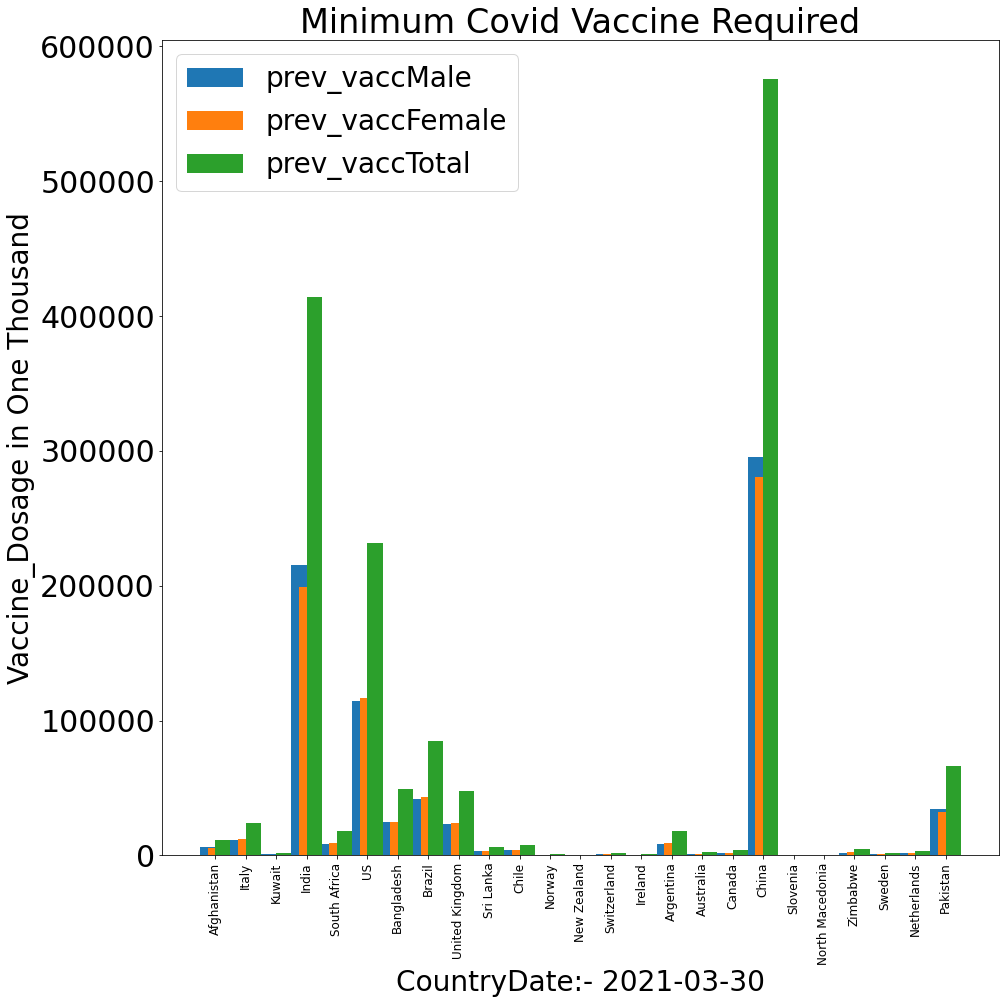

In [128]:
Visualize1(final_Clus_dataframe_Clustering_Algo)

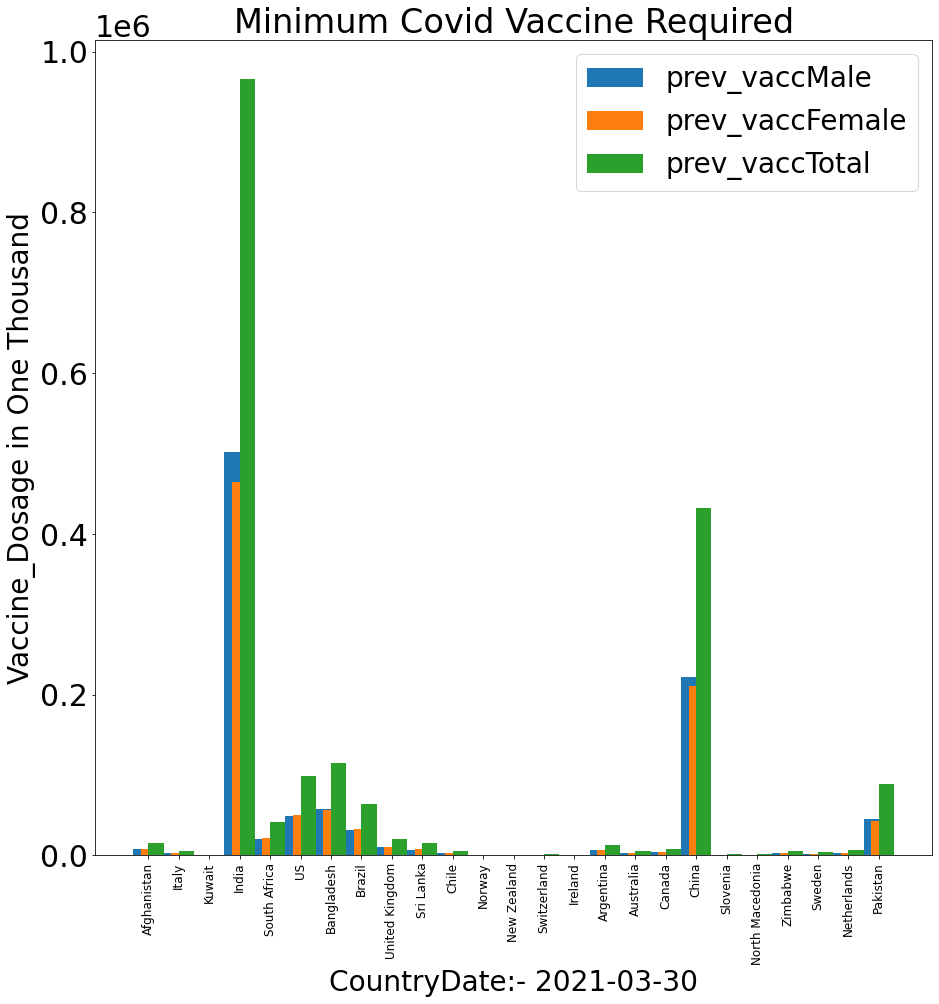

In [129]:
Visualize1(final_Clus_dataframe_Deep_net)

## Minimum Percentage Vaccine Required Plot
<a class="anchor" id="MinimumPercentageVaccineRequiredPlot"></a>

In [130]:
def Visualize2(final_Clus_dataframe):    
    ## Visualisation # 2
    ylab = "Percentage of Population Require Vaccine "
    xlab = "Country" + "Date:- " + Latest_date


    df = final_Clus_dataframe


    labels = df['Country']
    prev_vaccMale = df['Percent_Pop_Vac']

    title1 = 'Minimum Percentage of Vacine Required'

    #high = int(max(prev_2018))
    #low = 0  

    x = np.arange(len(labels))  # the x label locations 
    width = .50  # the width of the bars
    fig, ax = plt.subplots(figsize=(15,15))
    rects1 = ax.bar(x-width/2, prev_vaccMale, width, label='Percent_Pop_Vac')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(ylab)
    ax.set_xlabel(xlab)
    ax.set_title(title1)
    ax.set_xticks(x)
    #ax.set_yticks(y)
    plt.xticks(rotation=90) 
    #plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])
    ax.set_xticklabels(labels)
    ax.legend()



    plt.show()

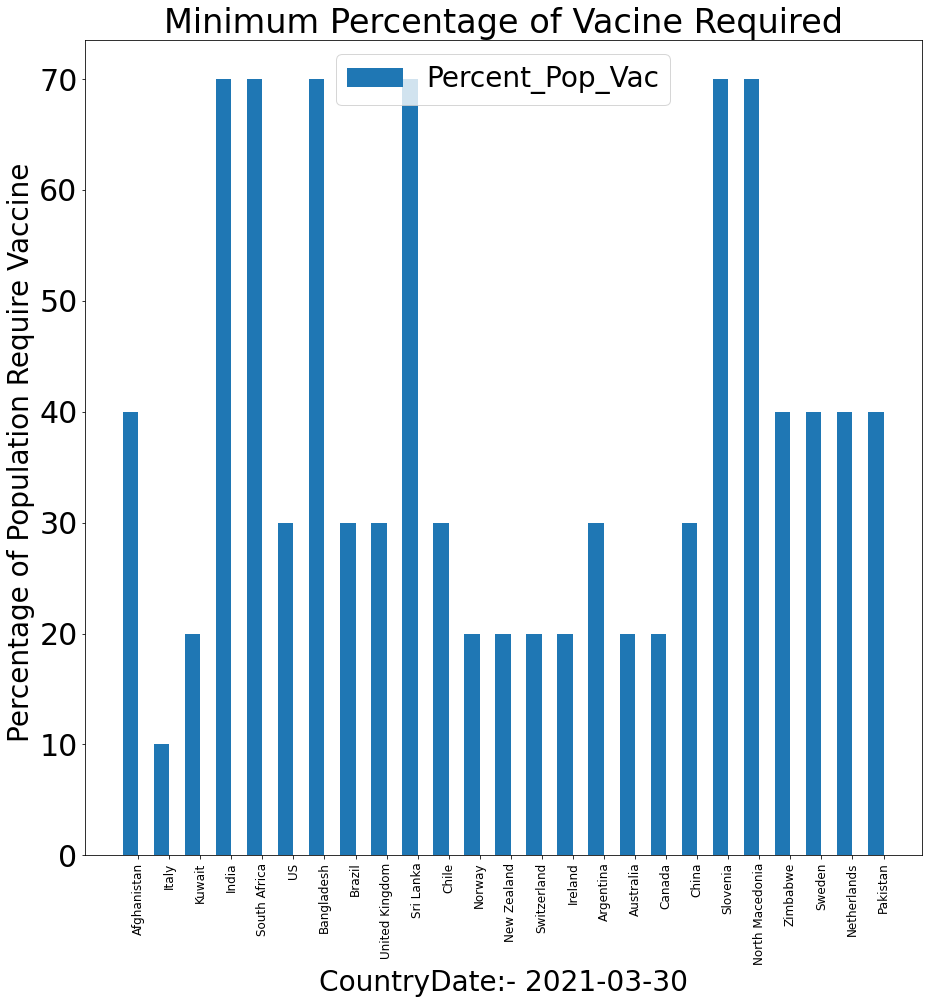

In [131]:
Visualize2(final_Clus_dataframe_Deep_net)

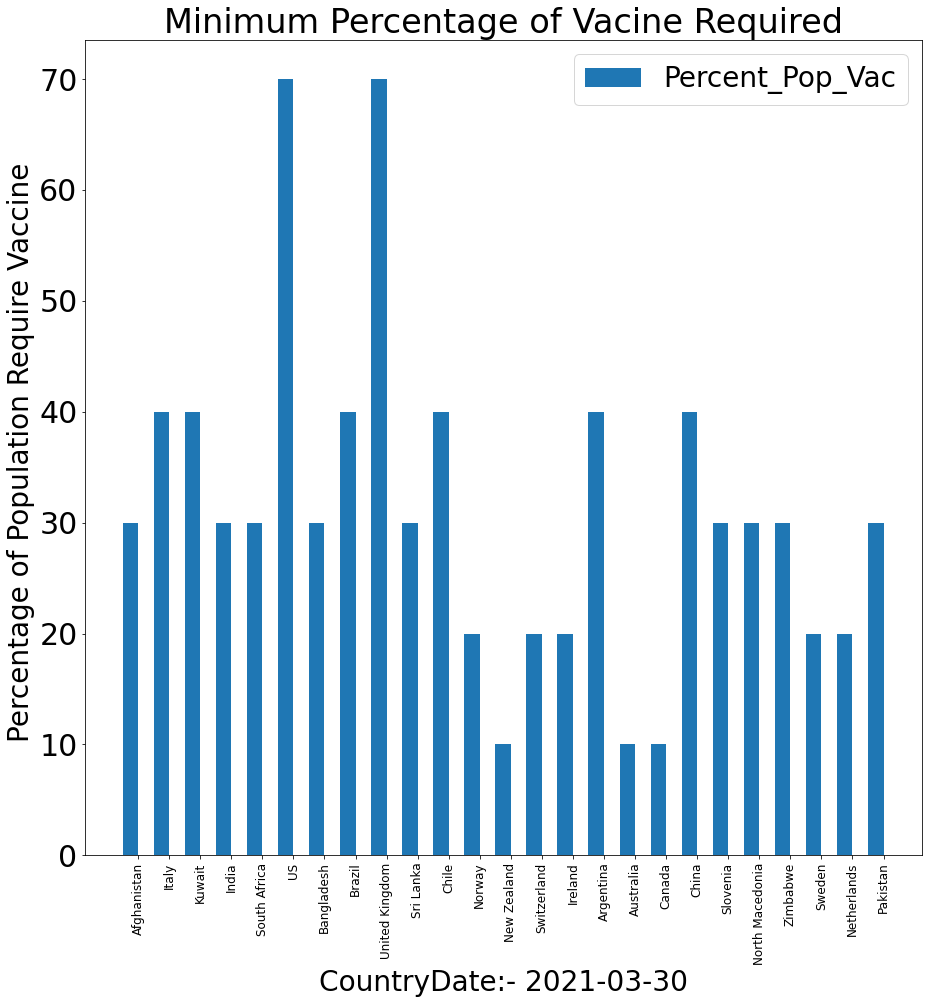

In [132]:
Visualize2(final_Clus_dataframe_Clustering_Algo)

## Countries Covid Vulnerability Status Plot
<a class="anchor" id="CountriesCovidVulnerabilityStatusPlot"></a>

In [133]:
def Visualize3(final_Clus_dataframe):    
    ## Visualisation # 3
    ylab = "Countries Covid Vulnerability Status "
    xlab = "Country" + "Date:- " + Latest_date


    df = final_Clus_dataframe


    labels = df['Country']
    prev_vaccMale = df['Vulnerability_int']

    title1 = 'Countires Covid Vulnerability Status'

    #high = int(max(prev_2018))
    #low = 0  

    x = np.arange(len(labels))  # the x label locations 
    width = .50  # the width of the bars
    fig, ax = plt.subplots(figsize=(15,15))
    #rects1 = ax.bar(x-width/2, prev_vaccMale, width, label='Vulnerability')
    rects1 = ax.bar(x-width/2, prev_vaccMale, width, label='Vulnerability \n0 - Low Impact \n 1 - Moderate Impact \
                    \n 2 - High Impact \n 3 - Severe Impact \n 4 - Critical Impact')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(ylab)
    ax.set_xlabel(xlab)
    ax.set_title(title1)
    ax.set_xticks(x)
    #ax.set_yticks(y)
    plt.xticks(rotation=90) 
    #plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])
    ax.set_xticklabels(labels)
    ax.legend()



    plt.show()

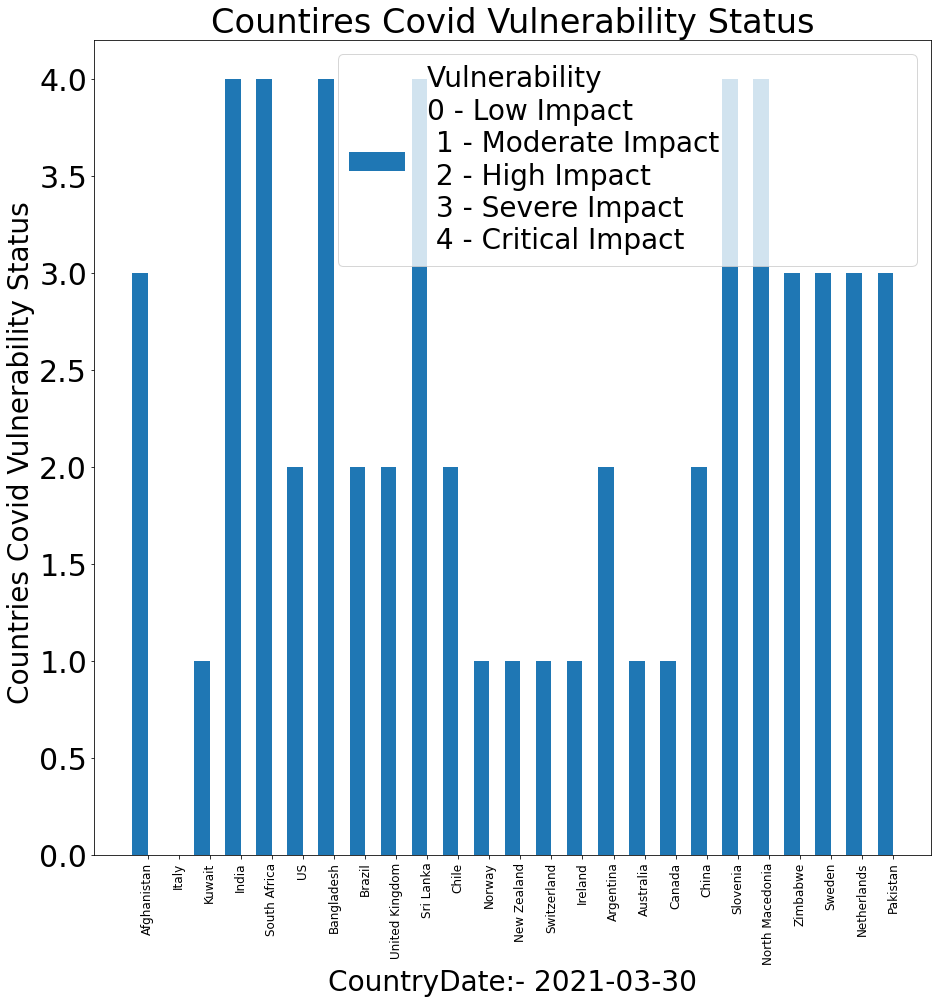

In [134]:
Visualize3(final_Clus_dataframe_Deep_net)

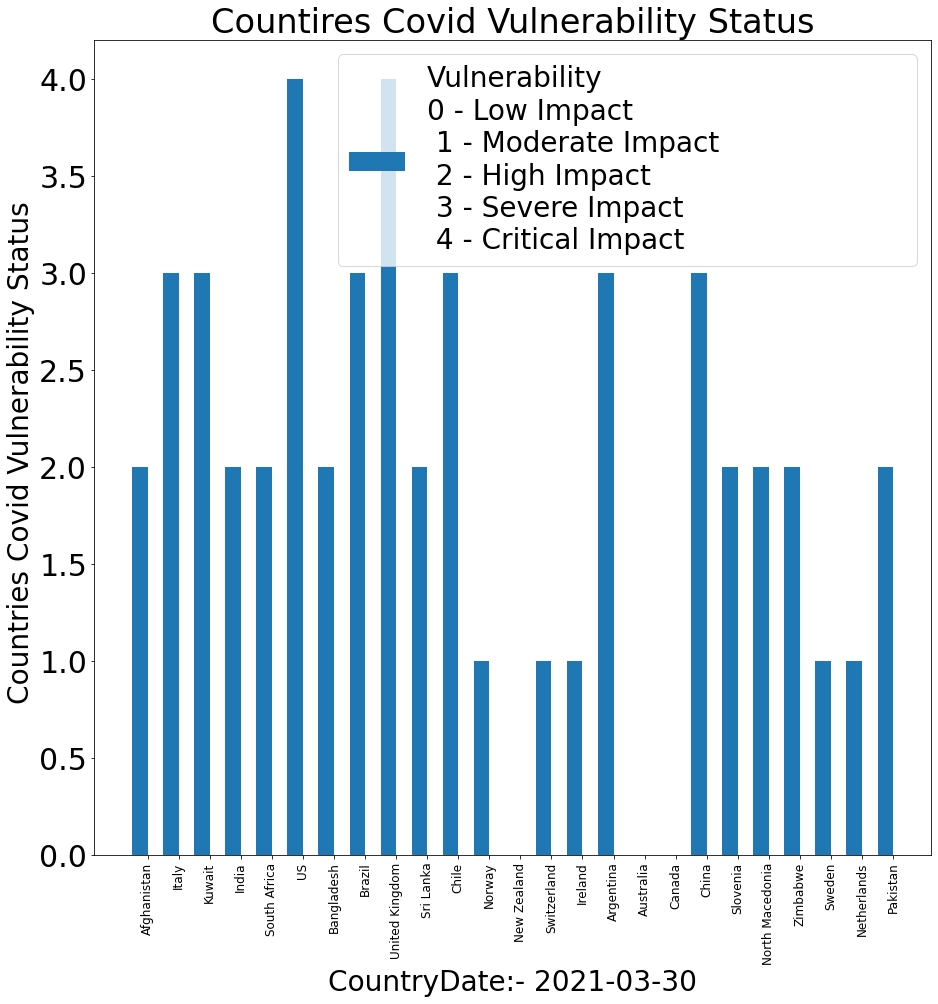

In [135]:
Visualize3(final_Clus_dataframe_Clustering_Algo)

## Points to Discuss
<a class="anchor" id="discuss"></a>

* Should we Take Present Data or Average for covid values
* Clusters Labeling Automation